### Surprise Housing, a US-based housing company named  has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
### Given, the company is looking at prospective properties to buy to enter the market, we are going to build a regression model using regularisation in order to predict the actual value of the prospective properties so that the company can use our model to decide whether to invest in them or not.

### We are going to use the dataset we have for our investigations and analysis. We will start with
#### 1. Data Exploration and Cleaning
#### 2. Uni, Bi and Multi-Variate analysis
#### 3. Prepare set of viable features
#### 4. Build a Model and tune it with Regularization Methods
#### 5. Present the Final Model

# -------------

#### Import Necessary Libraries

In [1056]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1125]:
# Setting Display options to Max so that we can veiw entire set of rows and columns

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

#### Read DataSet

In [1087]:
df= pd.read_csv('train.csv')

In [1088]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [1089]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1090]:
df.shape

(1460, 81)

In [1091]:
# Checking for Nulls
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### We will remove columns that have 80% or more of the data missing

In [1092]:
rem_col=[]
for col in df.columns:
    if round((df[col].isna().sum()/len(df.index))*100,2) >=80:
        rem_col.append(col)
        
print(rem_col)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [1093]:
# Deleting columns with 80% Null Values
df= df.drop(df[rem_col], axis=1)

#### Lets analyze the remaining columns that have Null Values

In [1094]:
columns_with_nulls = df.columns[df.isna().any()].tolist()

In [1095]:
df[columns_with_nulls].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Checking the relation of the columns with Null Values and the Target. If there isnt much of a relation, entire column can be dropped

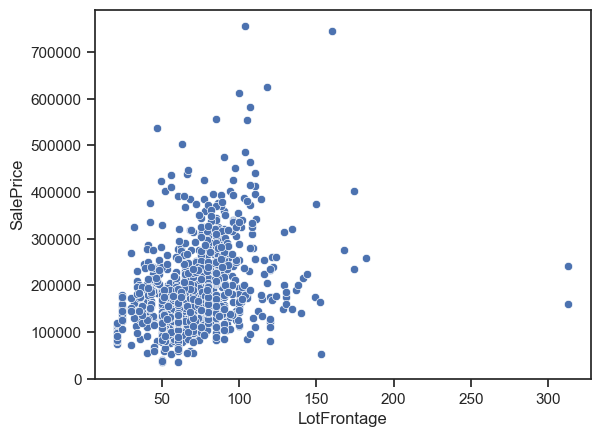

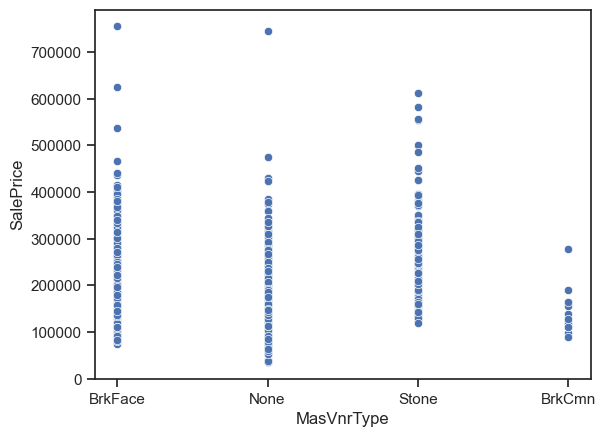

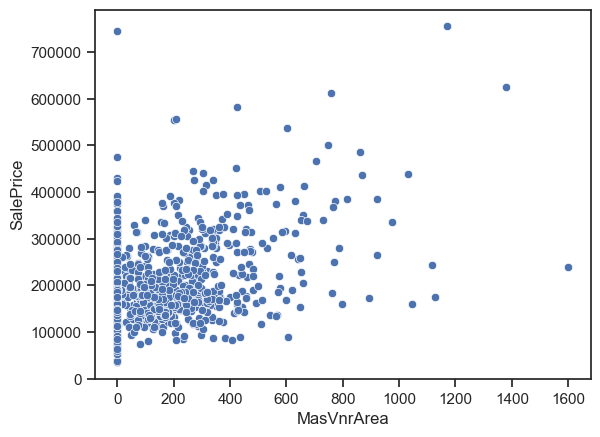

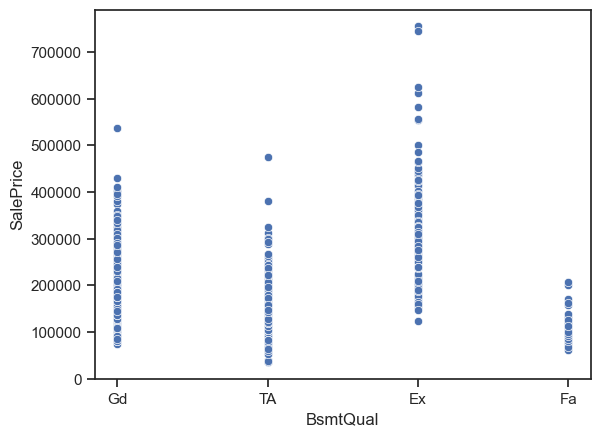

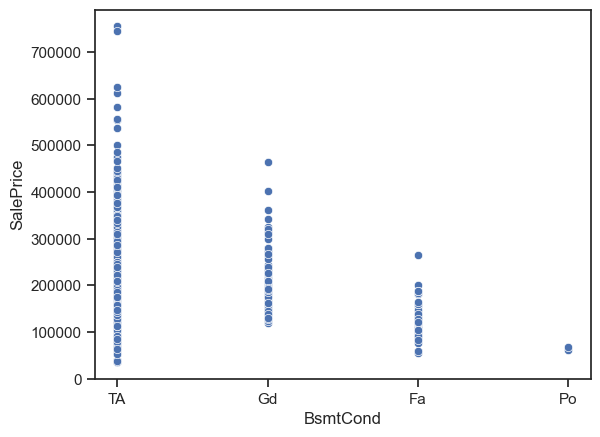

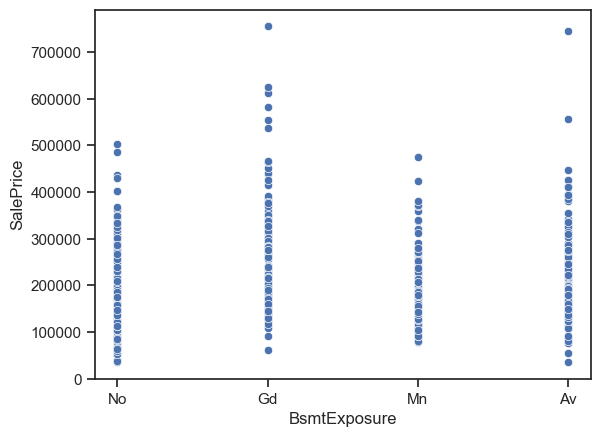

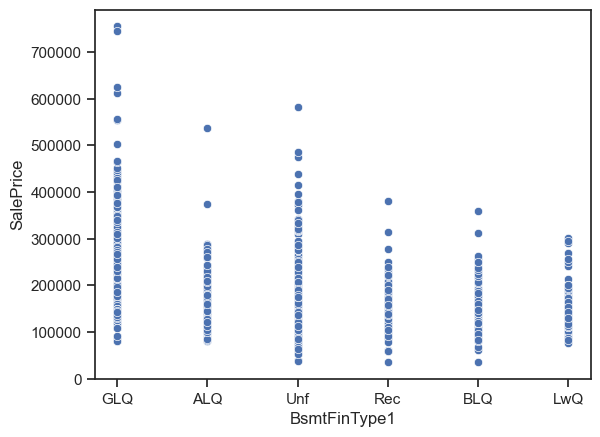

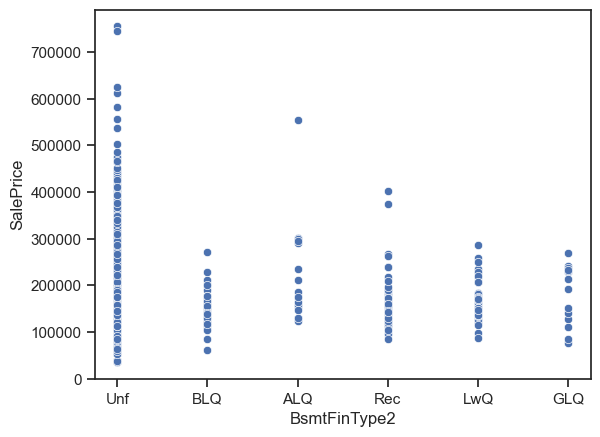

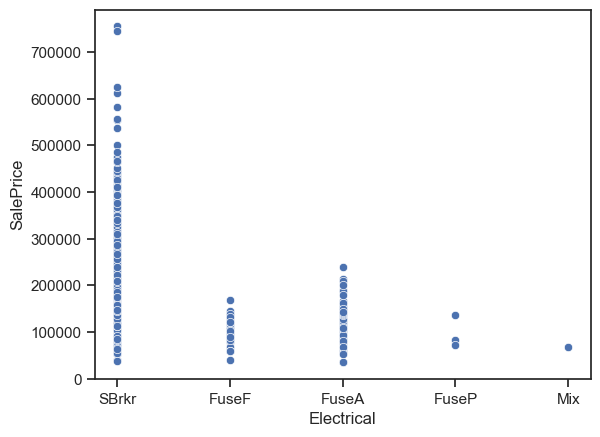

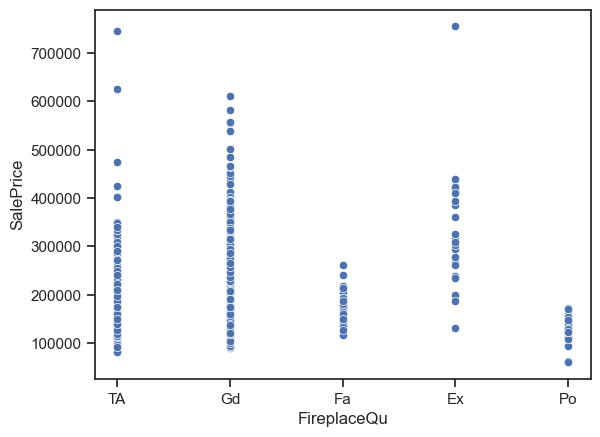

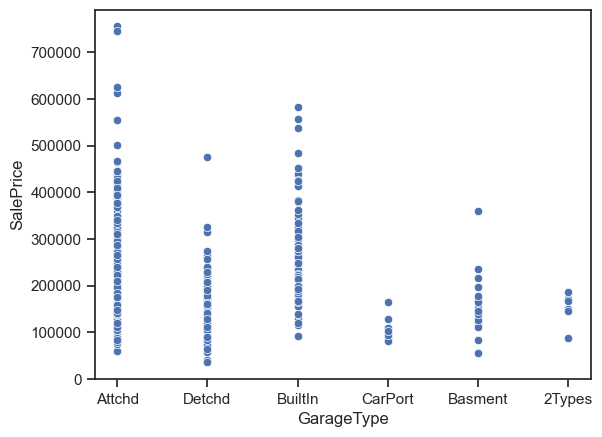

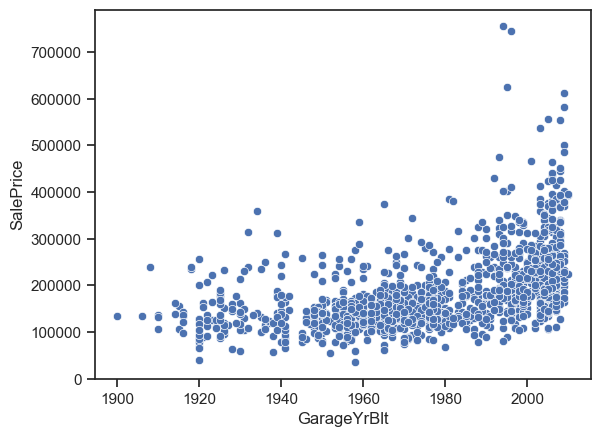

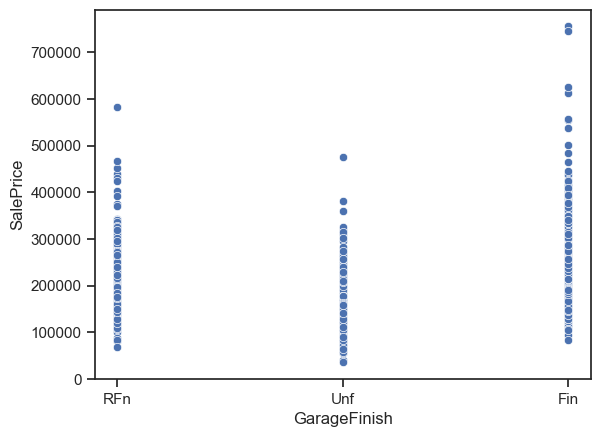

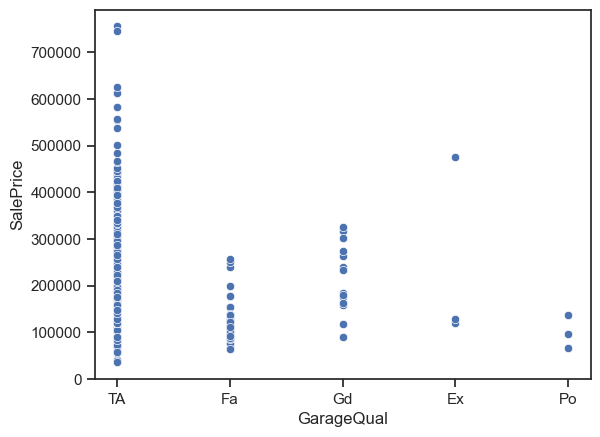

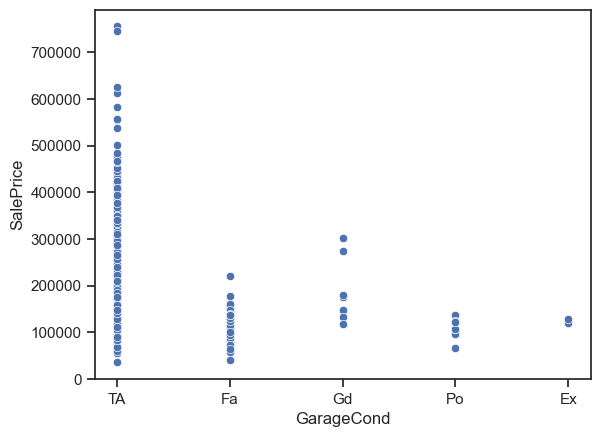

In [1096]:
for col in columns_with_nulls:
    sns.scatterplot(data=df, x=col, y='SalePrice')
    plt.show()

#### Below columns seem to have some relation with Target
LotFrontage, MasVnrArea,BsmtCond, GarageType, GarageYrBlt, GarageQual

#### Below columns dont seem to have much of a relation with Target and can be dropped
MasVnrType, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2,FireplaceQu, GarageFinish, GarageCond

In [1097]:
drop_Col1=['FireplaceQu']
df= df.drop(drop_Col1, axis=1)
#['MasVnrType', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu', 'GarageFinish', 'GarageCond']

#### Rechecking the columns with Null Values

In [1098]:
columns_with_nulls = df.columns[df.isna().any()].tolist()

In [1099]:
df[columns_with_nulls].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Replacing all NA with NoGa for NA here means property doesnt have a Garrage

In [1100]:
Grg_NA=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for col in Grg_NA:
    df[col]=df[col].fillna('NoGa')

#### Similarly for Basement fields with NA mean no Basement hence replacing with NoBa

In [1101]:
Bsm_NA=['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']
for col in Bsm_NA:
    df[col]=df[col].fillna('NoBa')

<Axes: >

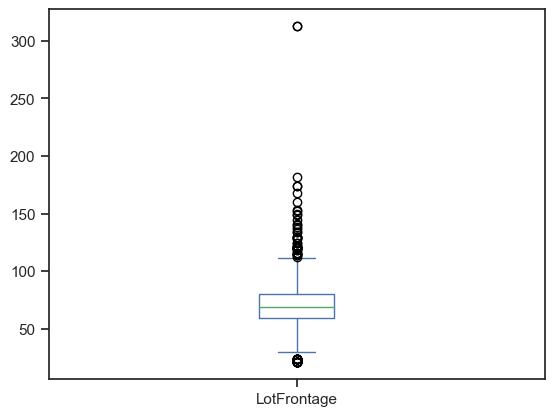

In [1073]:
df.LotFrontage.plot.box()

In [1102]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mode().iloc[0])
# field_Na=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','MasVnrArea','Electrical']
# for col in field_Na:
#     df=df[~df[col].isna()]
df=df[~df['MasVnrArea'].isna()]
df=df[~df['Electrical'].isna()]
# garrage_Col= ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
# df=df[~df[garrage_Col].isna()]
#['MasVnrType', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu'] 

In [1103]:
columns_with_nulls = df.columns[df.isna().any()].tolist()

In [1104]:
df[columns_with_nulls].isna().sum()

Series([], dtype: float64)

In [1105]:
for col in columns_with_nulls:
    df=df[~df[col].isna()]

In [1106]:
df[columns_with_nulls].isna().sum()

Series([], dtype: float64)

#### Checking the DF columns after Null values have been treated

In [1107]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [1108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

#### Checking the target variable, there arent enough outliers to introduce any bias, also there isnt enough data available that can allow removal or outliers

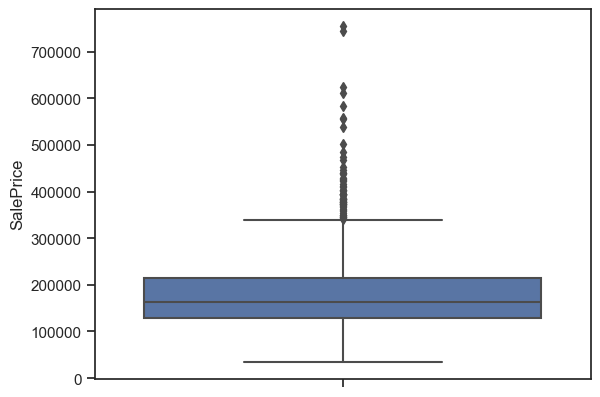

In [1109]:
sns.boxplot(y='SalePrice',data=df)
plt.show()

#### Creating a Pairplot to check the relation of the features with the Target

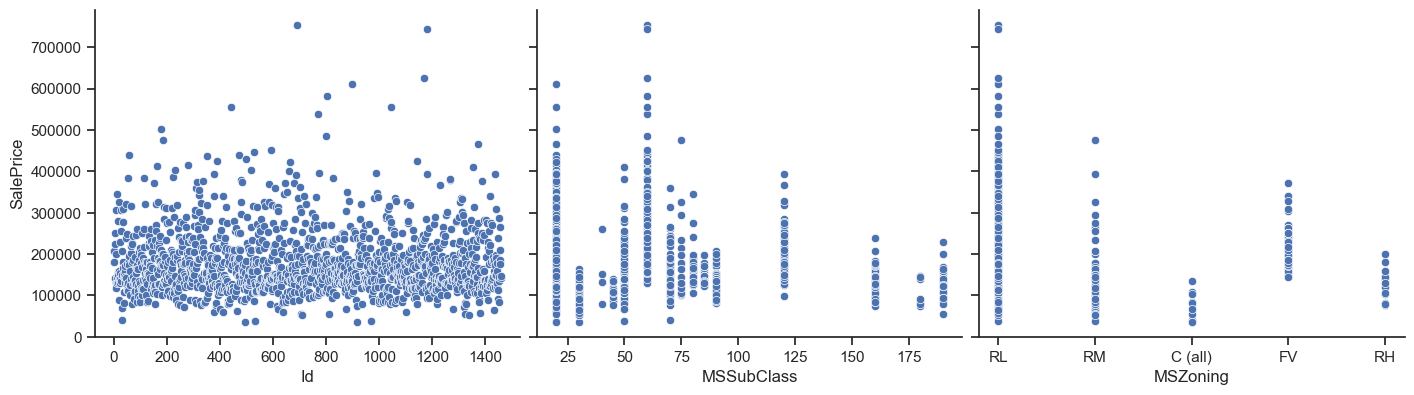

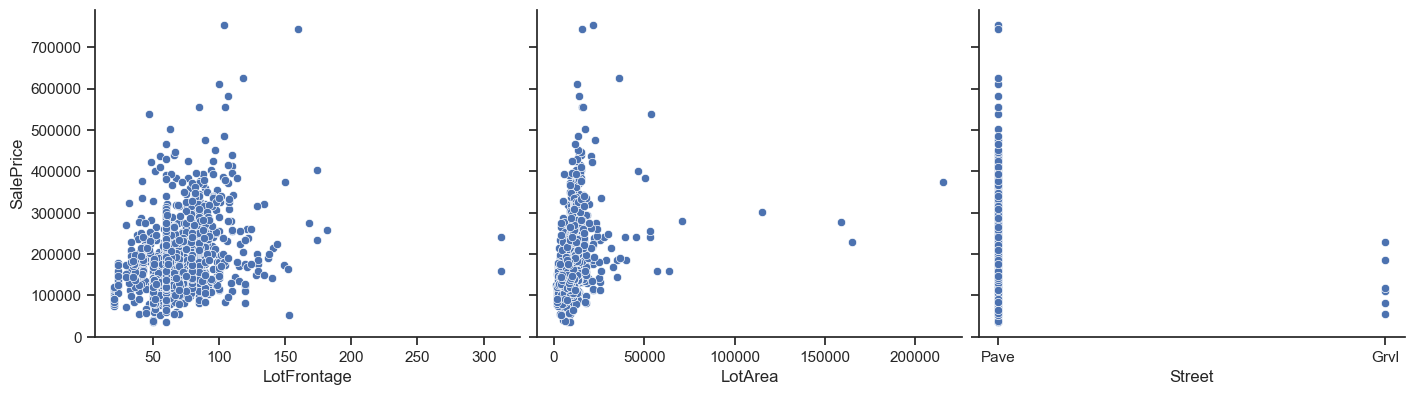

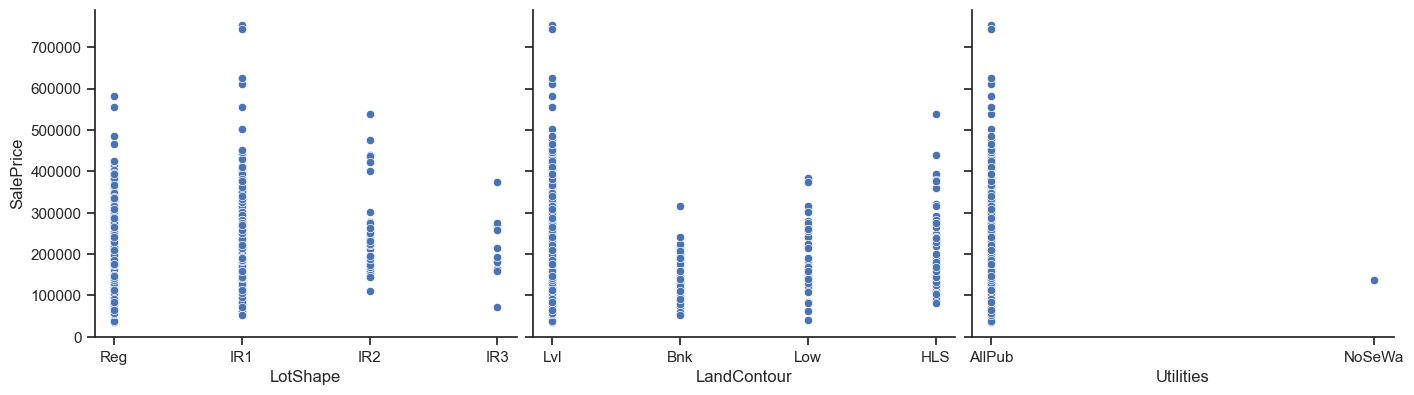

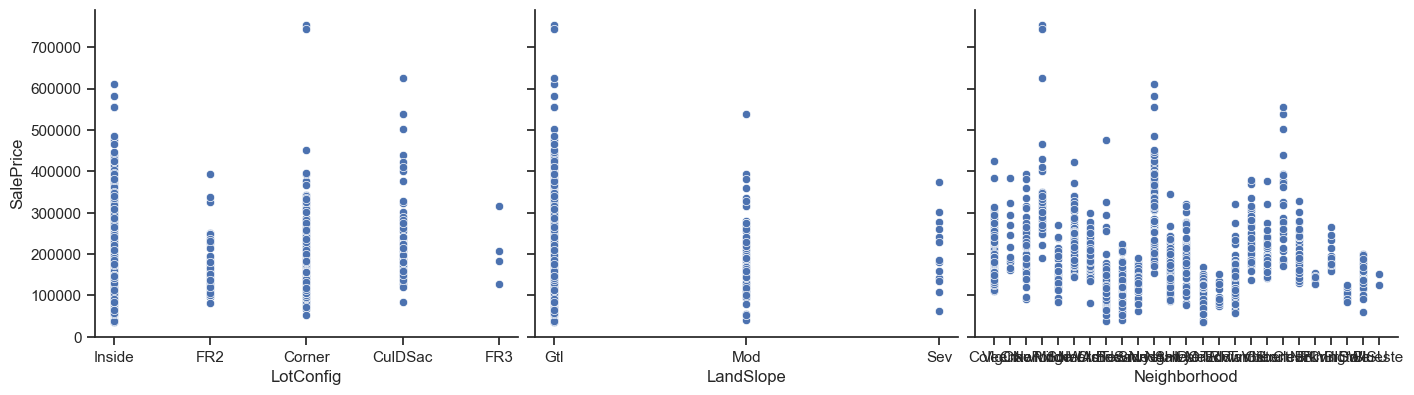

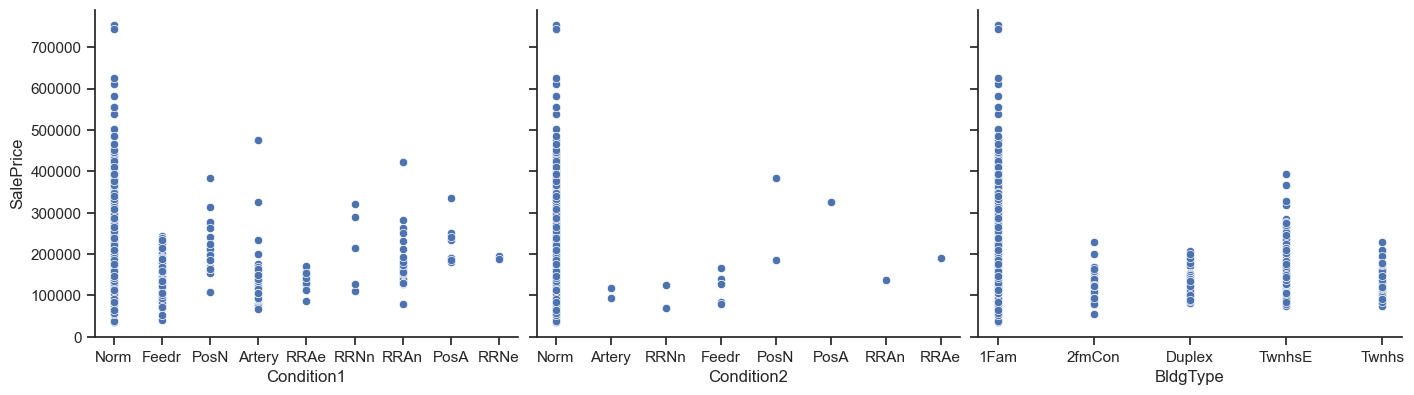

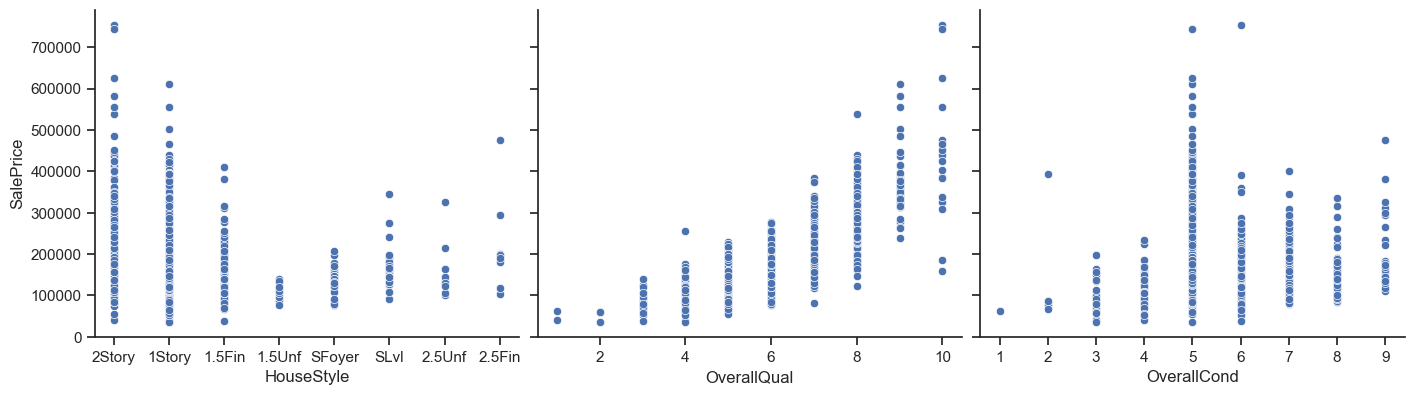

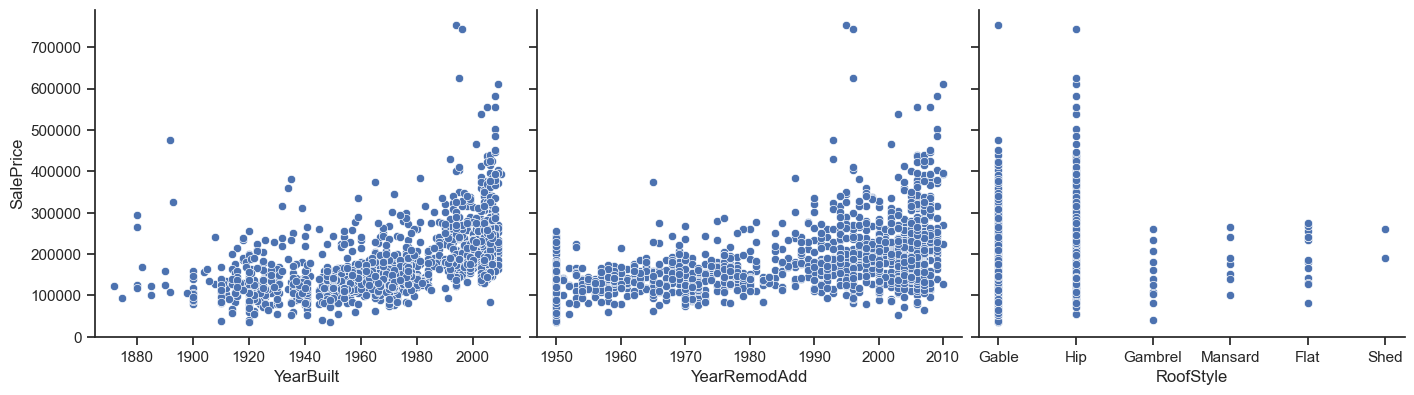

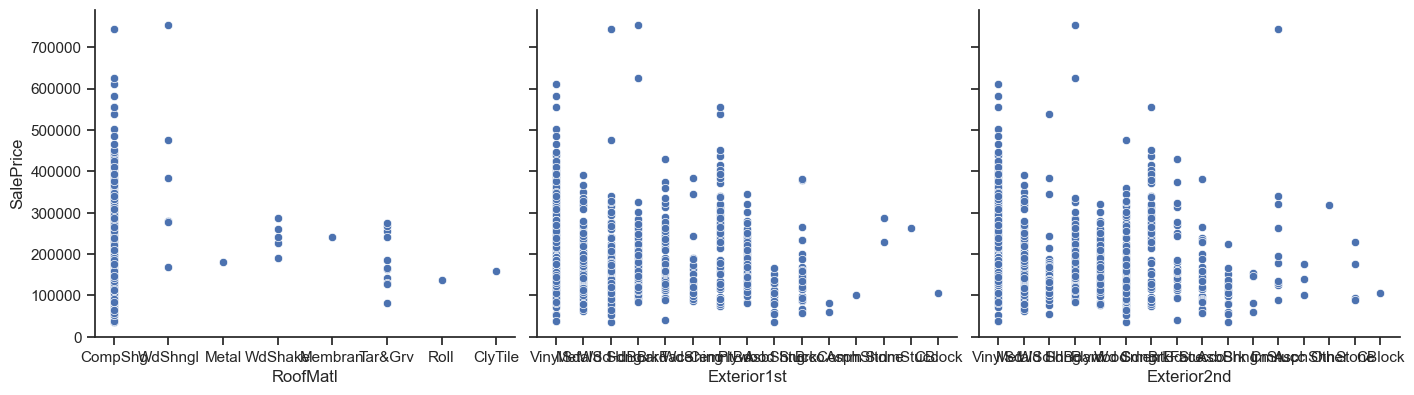

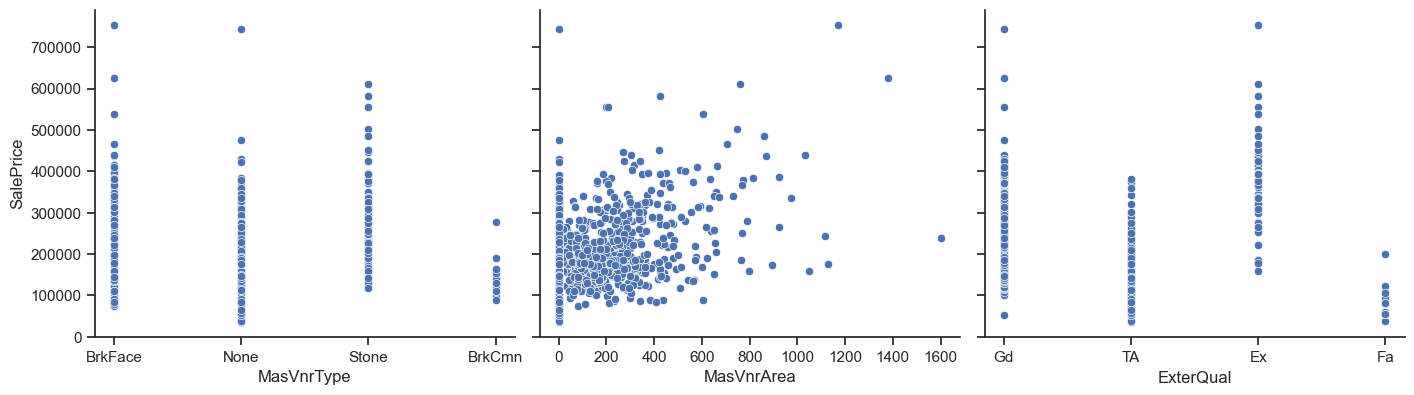

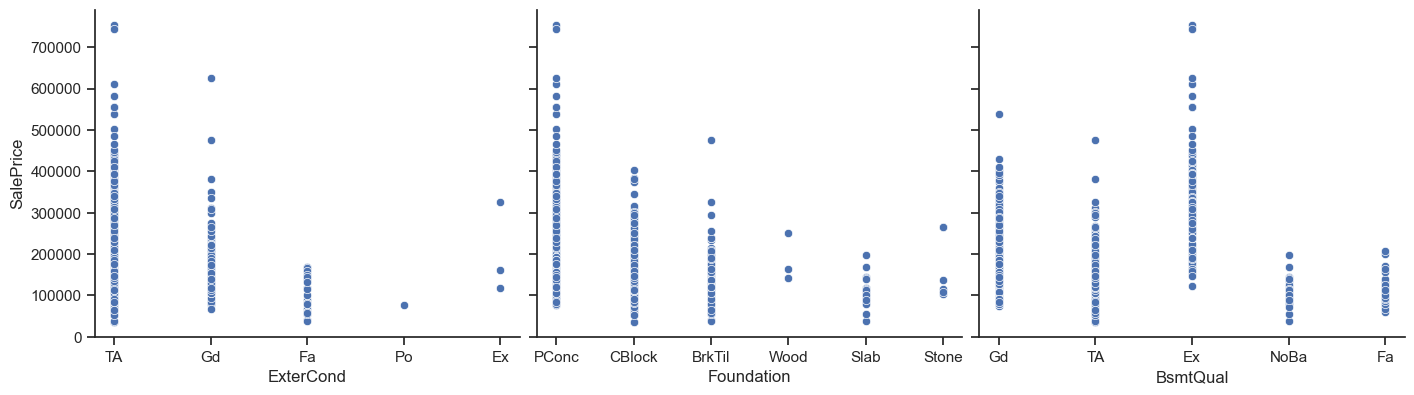

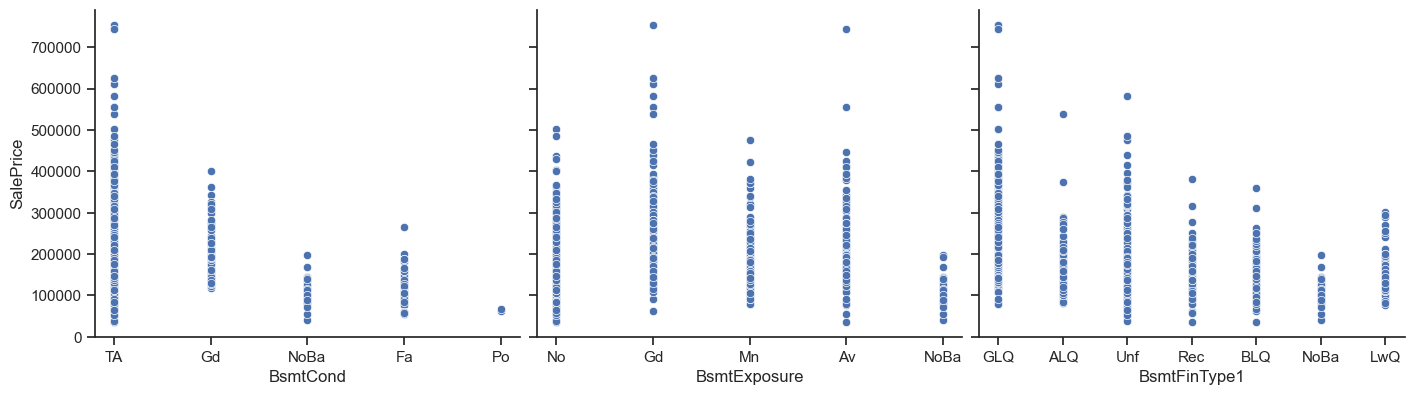

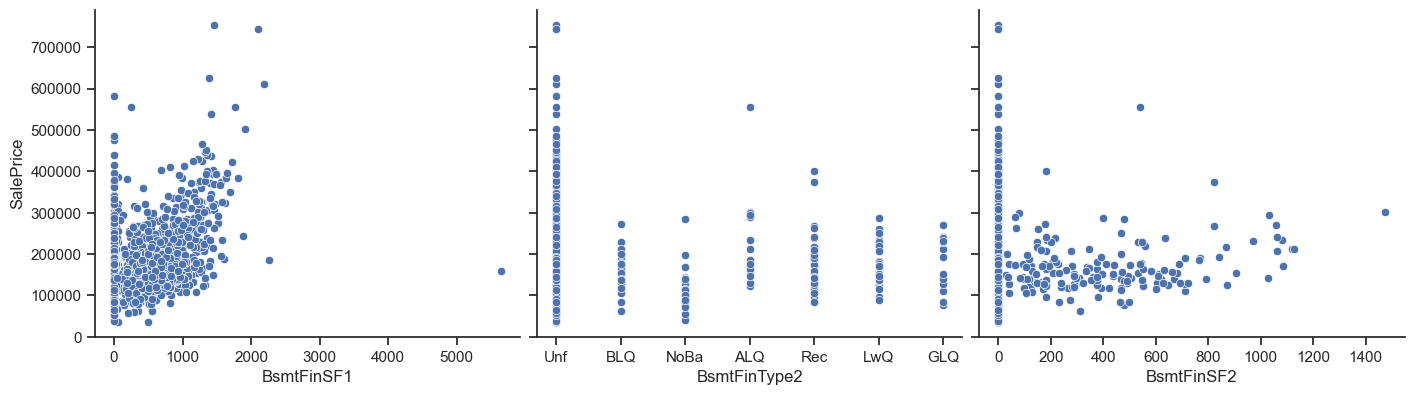

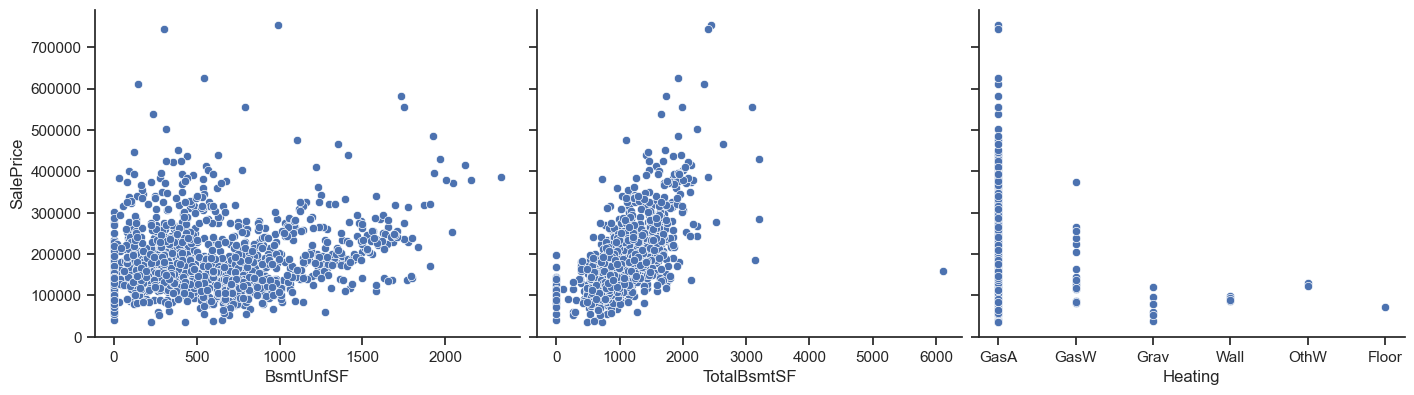

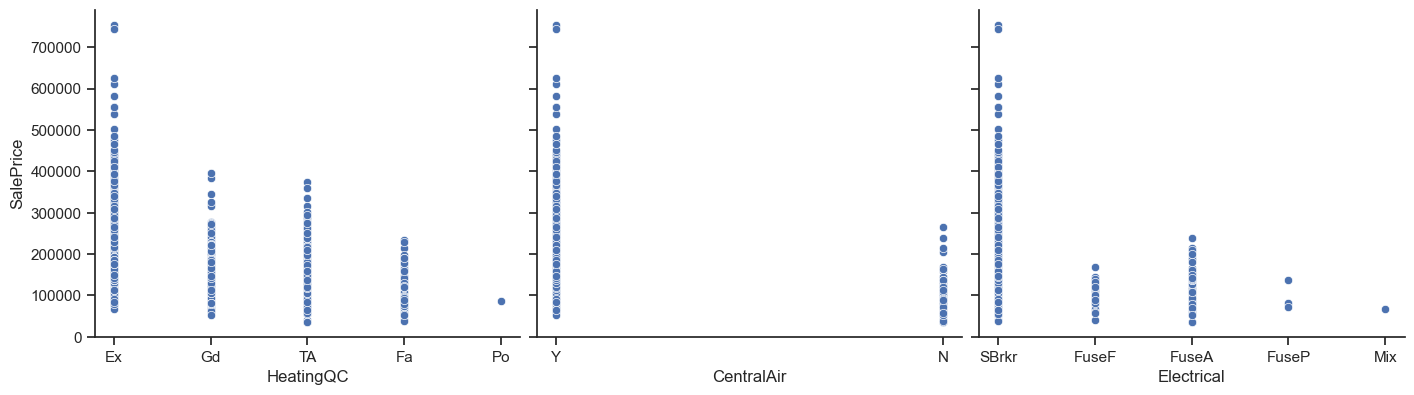

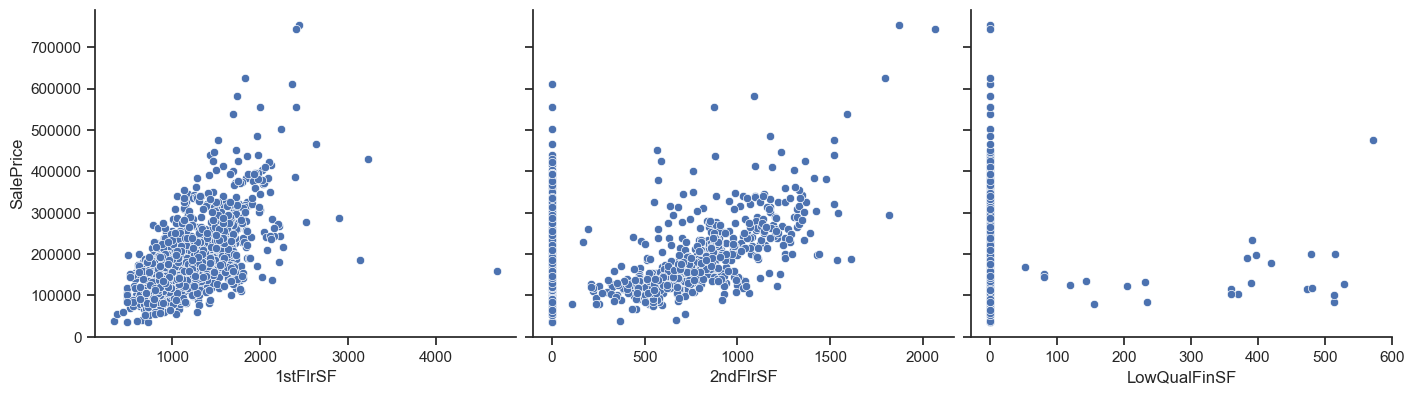

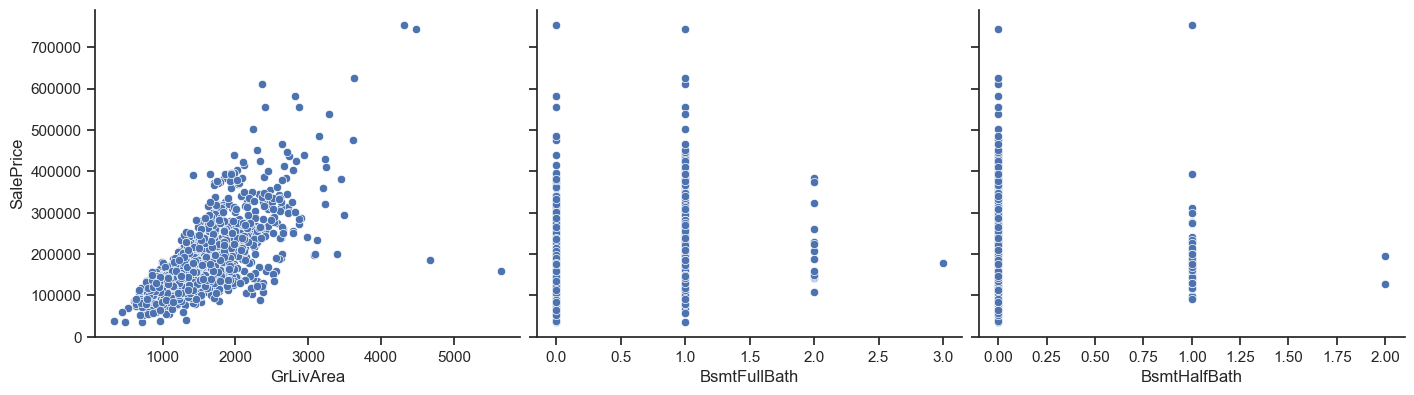

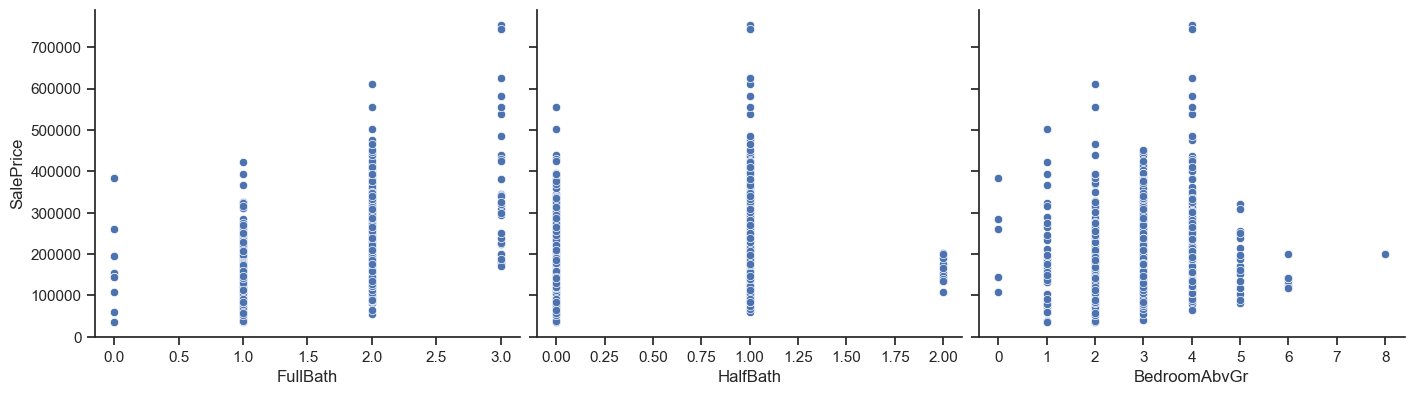

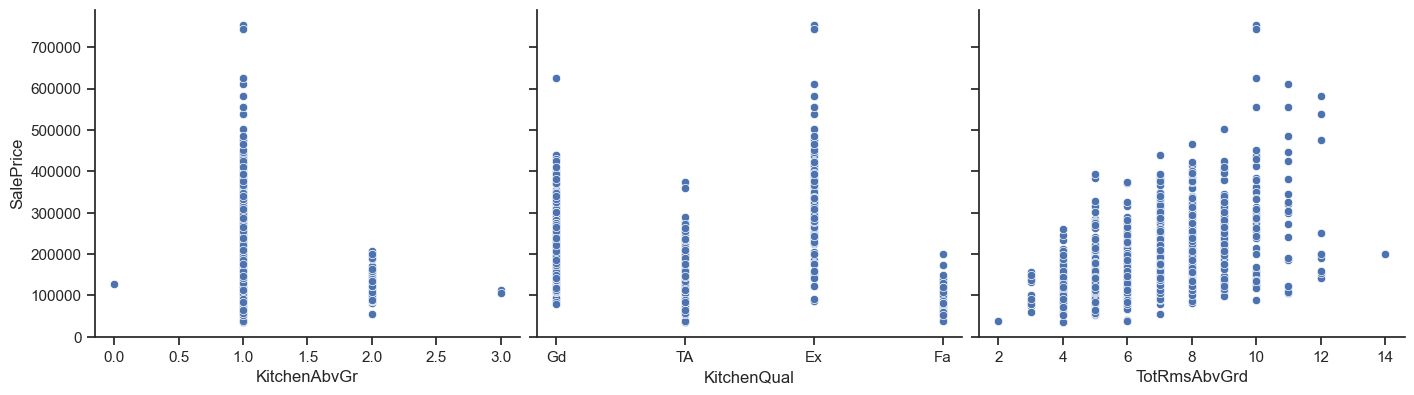

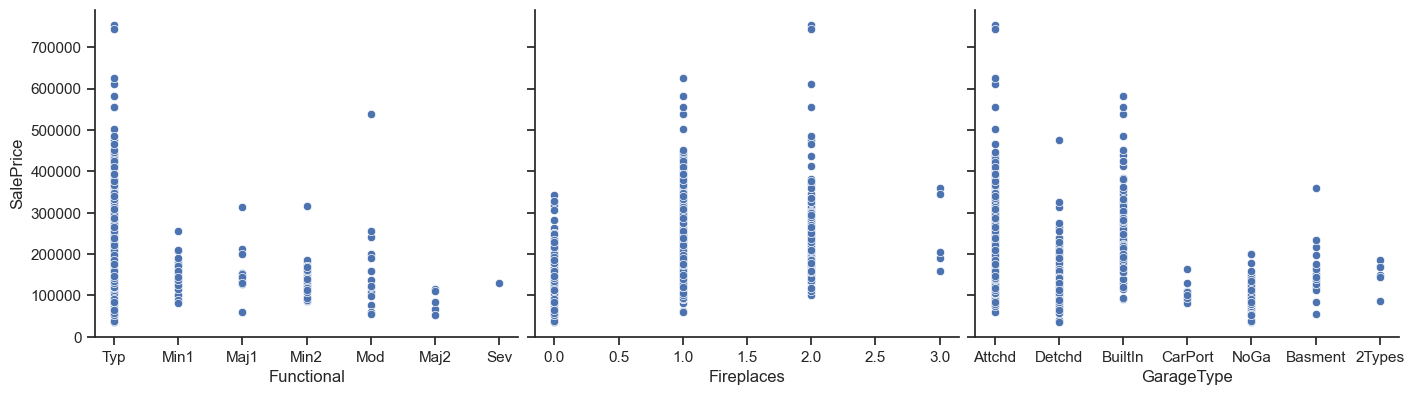

ValueError: could not convert string to float: 'NoGa'

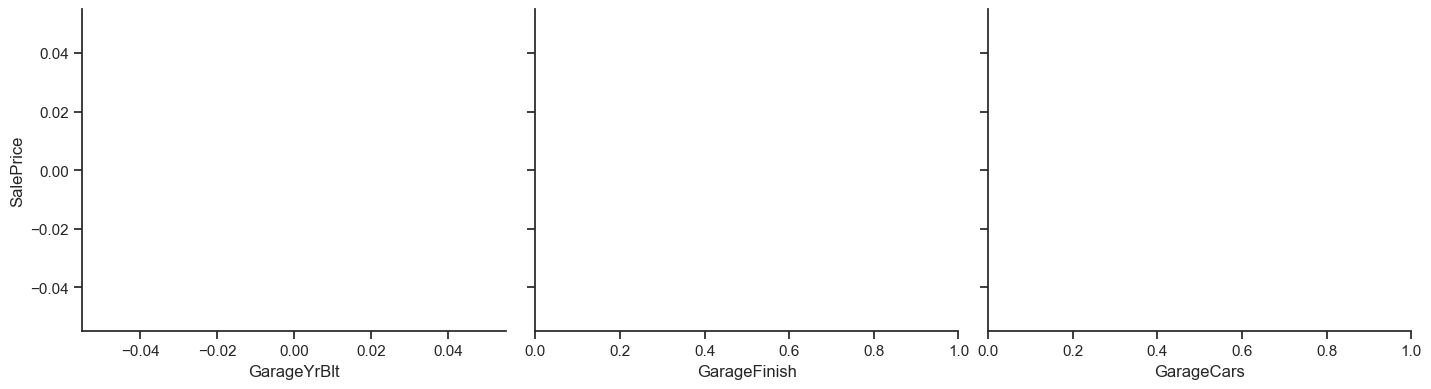

In [1110]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Post above analysis, below columns will be dropped, as they dont contribute much to the Target
#### ['LowQualFinSF','KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath','3SsnPorch' ,'MoSold', 'YrSold', ‘ScreenPorch','PoolArea','MiscVal','Utilities','LotShape','LandContour','Street', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'HalfBath', ‘GarageFinish’,’LotShape’,’HeatingQC’,’Electrical’,’Functional’,’PavedDrive’,’MoSold’,’YrSold’]


In [1111]:
delC = ['Id', 'LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Utilities', 'LotShape', 'LandContour', 'Street', 'Condition2', 'RoofMatl', 'Heating', 'LotShape', 'HeatingQC', 'Electrical', 'Functional', 'PavedDrive']
df=df.drop(delC,axis=1)

In [ ]:
df.info()

#### Verifying using heatmap

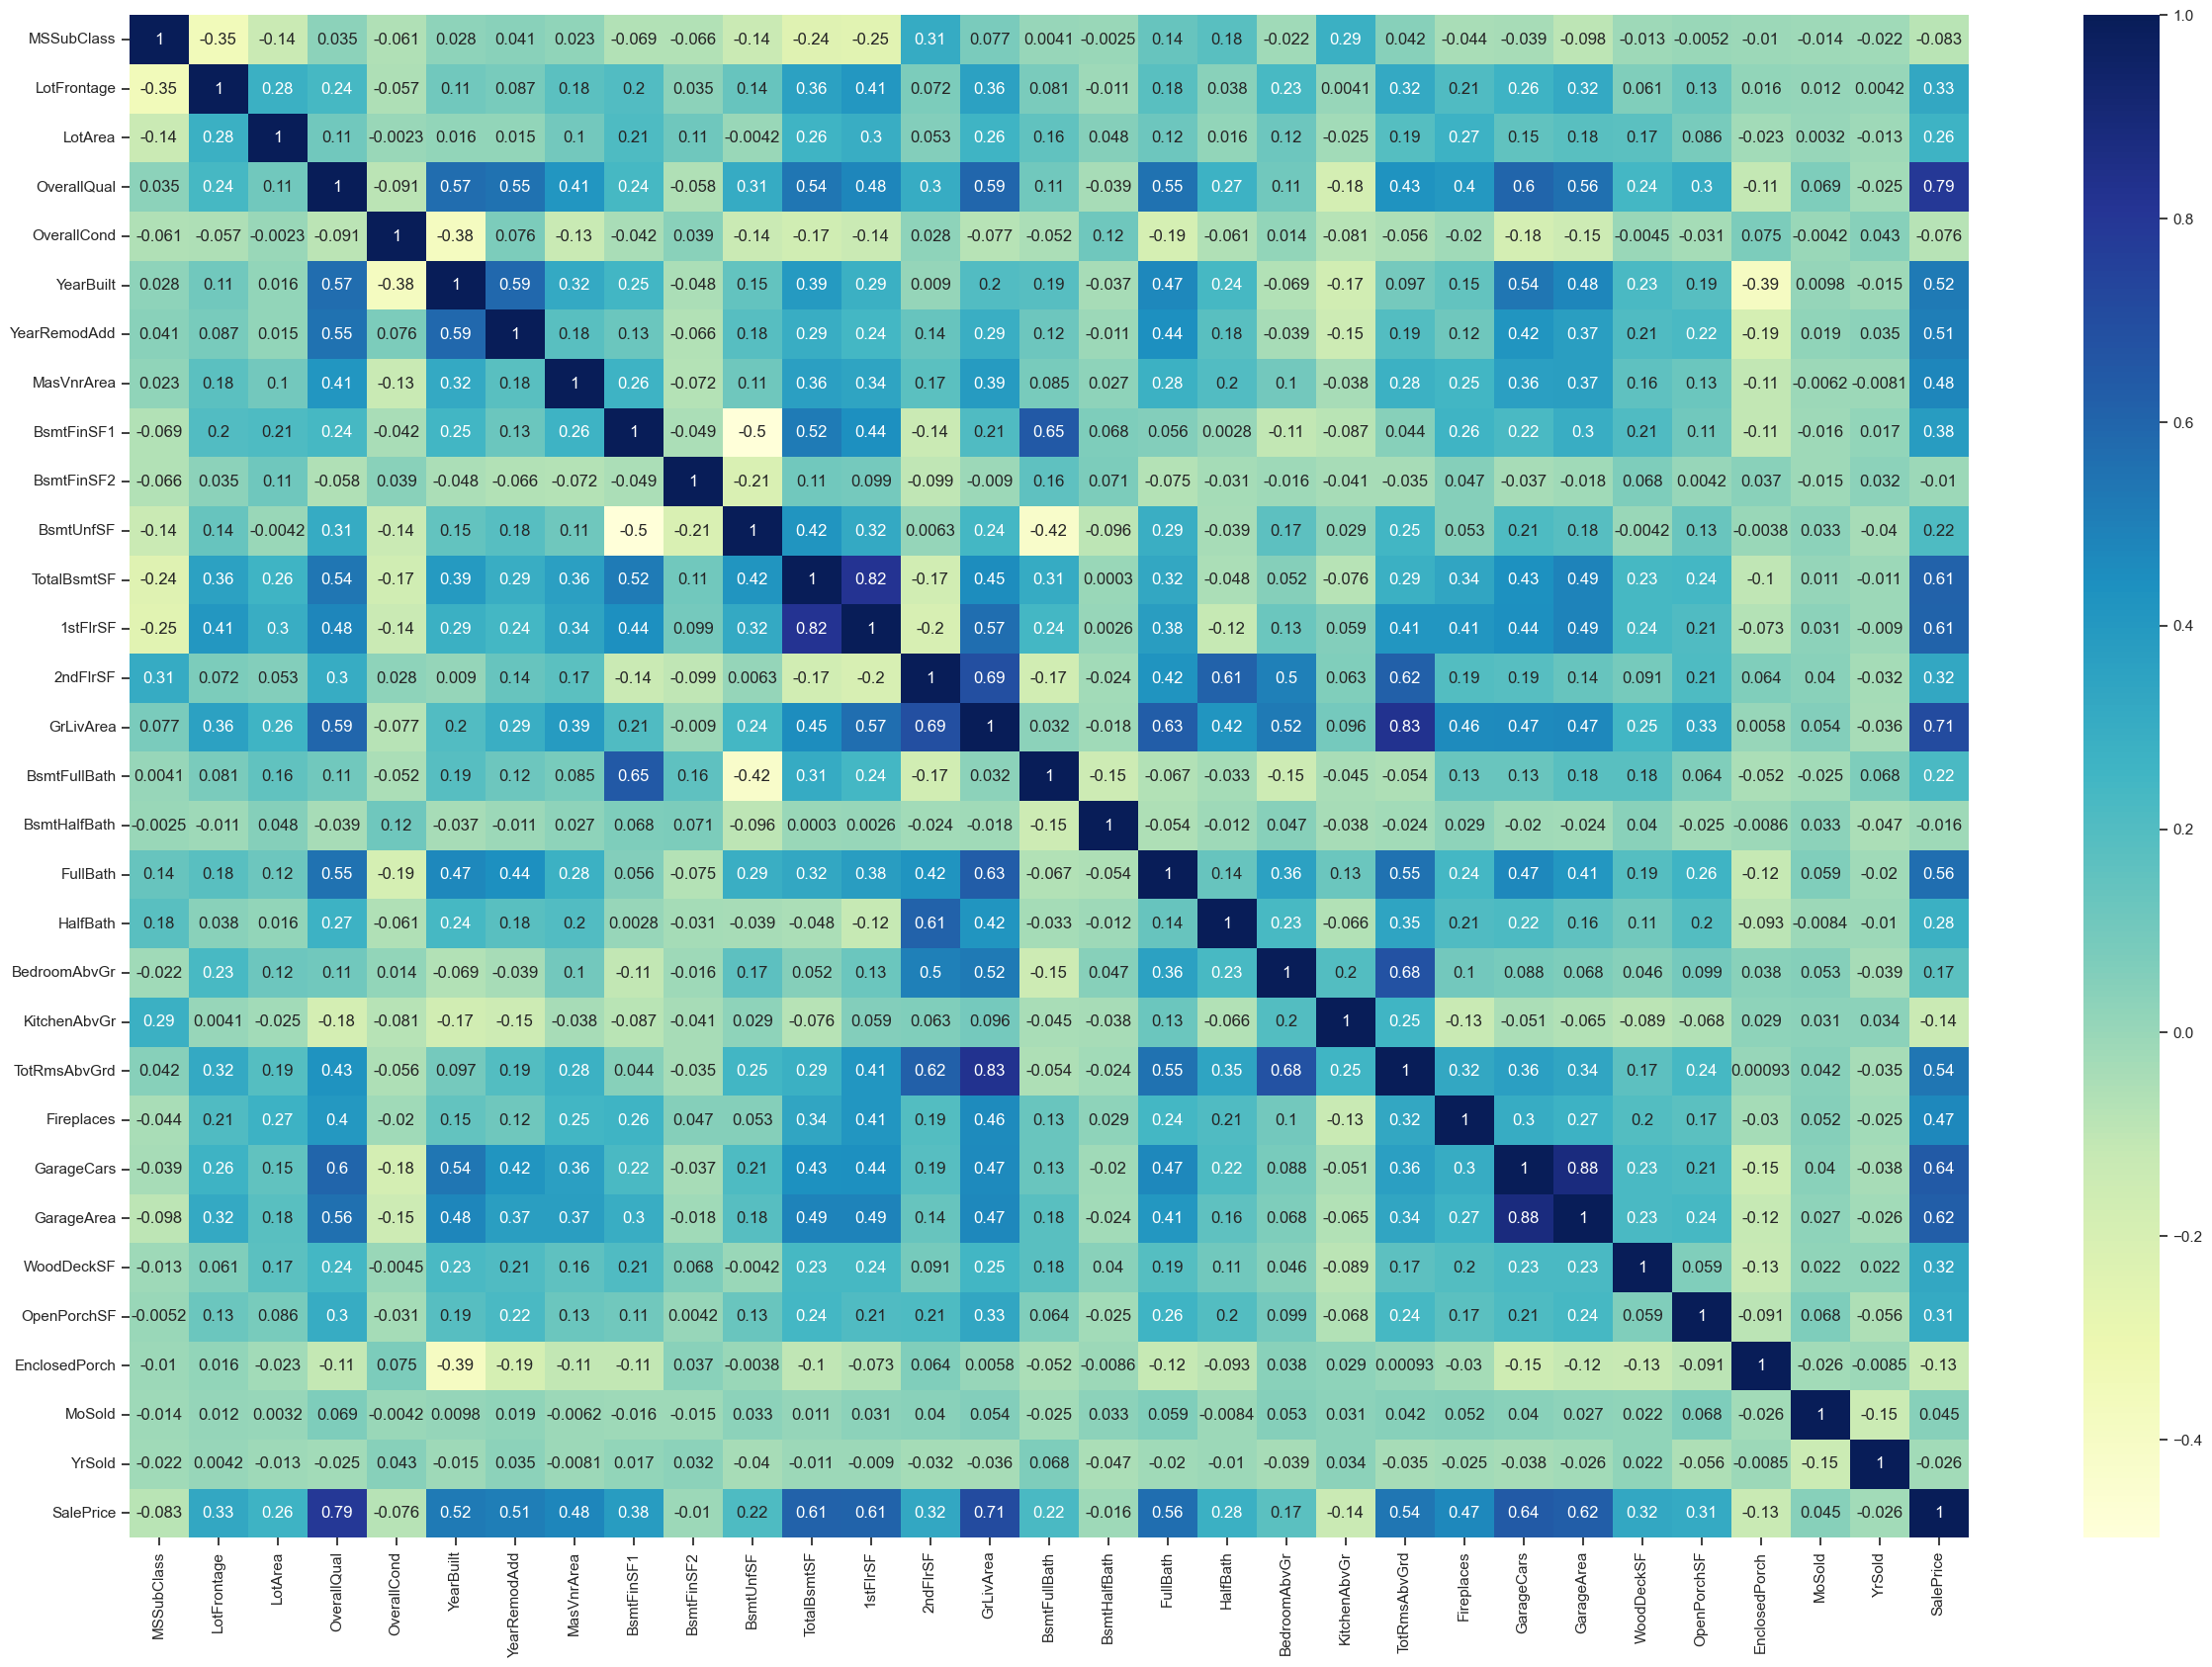

In [1112]:
plt.figure(figsize=(30,20))
cor=df.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [1114]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
round(correlation_with_target*100,2)

SalePrice        100.00
OverallQual       79.01
GrLivArea         71.01
GarageCars        63.97
GarageArea        62.25
TotalBsmtSF       61.33
1stFlrSF          60.70
FullBath          56.27
TotRmsAbvGrd      53.64
YearBuilt         52.33
YearRemodAdd      50.75
MasVnrArea        47.75
Fireplaces        46.90
BsmtFinSF1        38.40
LotFrontage       32.76
WoodDeckSF        32.47
2ndFlrSF          32.28
OpenPorchSF       31.12
HalfBath          28.23
LotArea           26.47
BsmtFullBath      22.50
BsmtUnfSF         21.57
BedroomAbvGr      17.20
MoSold             4.51
BsmtFinSF2        -1.03
BsmtHalfBath      -1.60
YrSold            -2.62
OverallCond       -7.64
MSSubClass        -8.28
EnclosedPorch    -12.88
KitchenAbvGr     -13.74
Name: SalePrice, dtype: float64

In [1115]:
obj_Col=[]
num_col=[]
for col in df.columns:
    if df[col].dtype == 'object':
        obj_Col.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        num_col.append(col)

In [1116]:
df[obj_Col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1451 non-null   object
 1   LotConfig      1451 non-null   object
 2   LandSlope      1451 non-null   object
 3   Neighborhood   1451 non-null   object
 4   Condition1     1451 non-null   object
 5   BldgType       1451 non-null   object
 6   HouseStyle     1451 non-null   object
 7   RoofStyle      1451 non-null   object
 8   Exterior1st    1451 non-null   object
 9   Exterior2nd    1451 non-null   object
 10  MasVnrType     1451 non-null   object
 11  ExterQual      1451 non-null   object
 12  ExterCond      1451 non-null   object
 13  Foundation     1451 non-null   object
 14  BsmtQual       1451 non-null   object
 15  BsmtCond       1451 non-null   object
 16  BsmtExposure   1451 non-null   object
 17  BsmtFinType1   1451 non-null   object
 18  BsmtFinType2   1451 non-null

In [1117]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   LotFrontage    1451 non-null   float64
 2   LotArea        1451 non-null   int64  
 3   OverallQual    1451 non-null   int64  
 4   OverallCond    1451 non-null   int64  
 5   YearBuilt      1451 non-null   int64  
 6   YearRemodAdd   1451 non-null   int64  
 7   MasVnrArea     1451 non-null   float64
 8   BsmtFinSF1     1451 non-null   int64  
 9   BsmtFinSF2     1451 non-null   int64  
 10  BsmtUnfSF      1451 non-null   int64  
 11  TotalBsmtSF    1451 non-null   int64  
 12  1stFlrSF       1451 non-null   int64  
 13  2ndFlrSF       1451 non-null   int64  
 14  GrLivArea      1451 non-null   int64  
 15  BsmtFullBath   1451 non-null   int64  
 16  BsmtHalfBath   1451 non-null   int64  
 17  FullBath       1451 non-null   int64  
 18  HalfBath

#### Scaling the numerical data

In [1119]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[num_col])

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.09090909, 0.5       ,
        0.24107763],
       [0.        , 0.20205479, 0.03879502, ..., 0.36363636, 0.25      ,
        0.20358284],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.72727273, 0.5       ,
        0.26190807],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.36363636, 1.        ,
        0.321622  ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.27272727, 1.        ,
        0.14890293],
       [0.        , 0.18493151, 0.04037019, ..., 0.45454545, 0.5       ,
        0.15636717]])

#### Creating dummies for the categorical columns

In [1120]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df[obj_Col], drop_first=True)
df_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  \
0            0            0            1            0                  0   
1            0            0            1            0                  0   
2            0            0            1            0                  0   
3            0            0            1            0                  0   
4            0            0            1            0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0     

In [1121]:
df=df.drop(obj_Col, axis=1)

In [1122]:
df= pd.concat([df,df_dummies], axis=1)

In [1146]:
obj_Col=[]
num_col=[]
dummy=[]
for col in df.columns:
    if df[col].dtype == 'object':
        obj_Col.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        num_col.append(col)
    else:
        dummy.append(col)

In [1147]:
delCol=[]
for col in df[dummy].columns:
    ones_count = df[col].sum()
    if ones_count<100:
        delCol.append(col)
    

In [1148]:
df=df.drop(delCol, axis=1)

In [1149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1451 non-null   int64  
 1   LotFrontage            1451 non-null   float64
 2   LotArea                1451 non-null   int64  
 3   OverallQual            1451 non-null   int64  
 4   OverallCond            1451 non-null   int64  
 5   YearBuilt              1451 non-null   int64  
 6   YearRemodAdd           1451 non-null   int64  
 7   MasVnrArea             1451 non-null   float64
 8   BsmtFinSF1             1451 non-null   int64  
 9   BsmtFinSF2             1451 non-null   int64  
 10  BsmtUnfSF              1451 non-null   int64  
 11  TotalBsmtSF            1451 non-null   int64  
 12  1stFlrSF               1451 non-null   int64  
 13  2ndFlrSF               1451 non-null   int64  
 14  GrLivArea              1451 non-null   int64  
 15  Bsmt

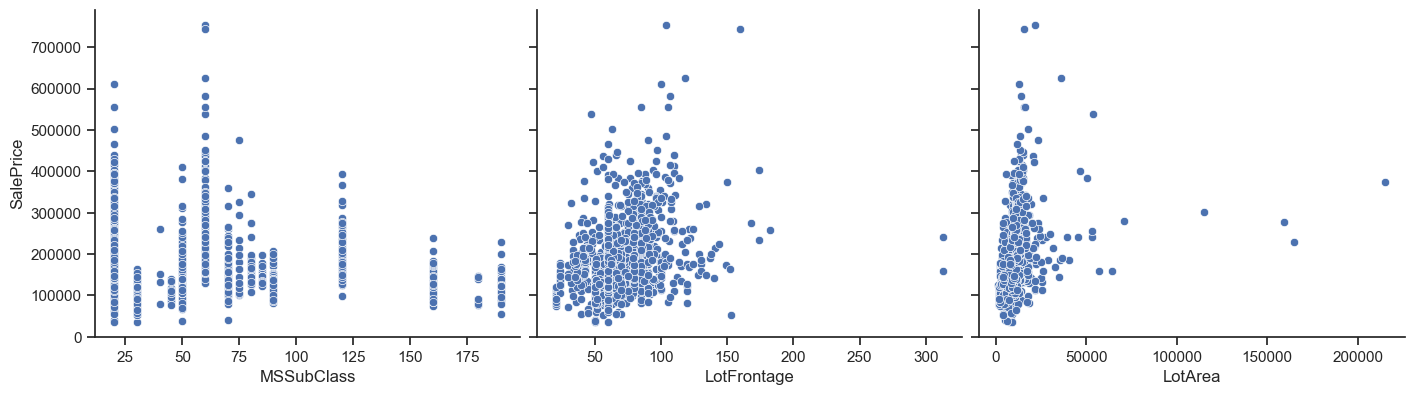

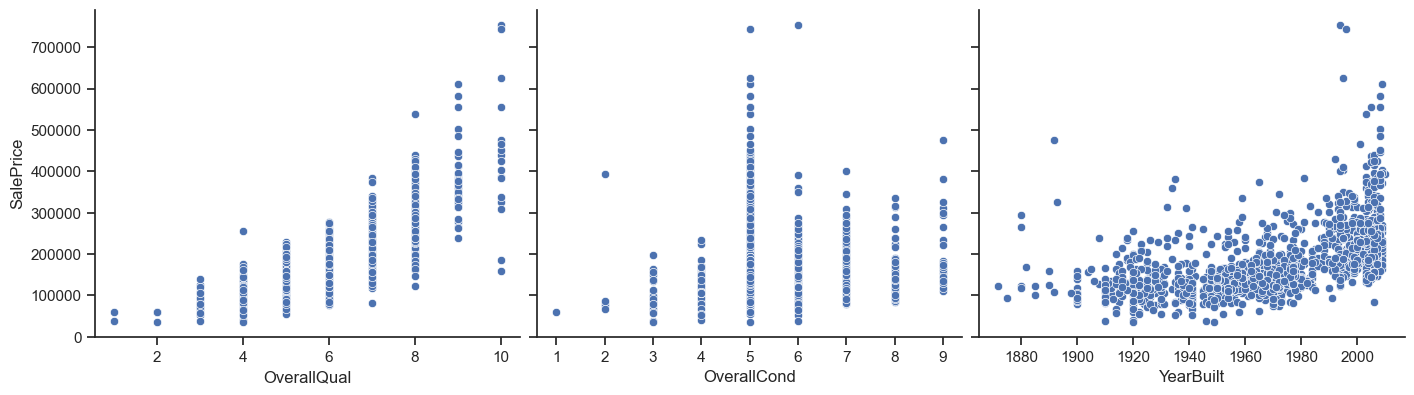

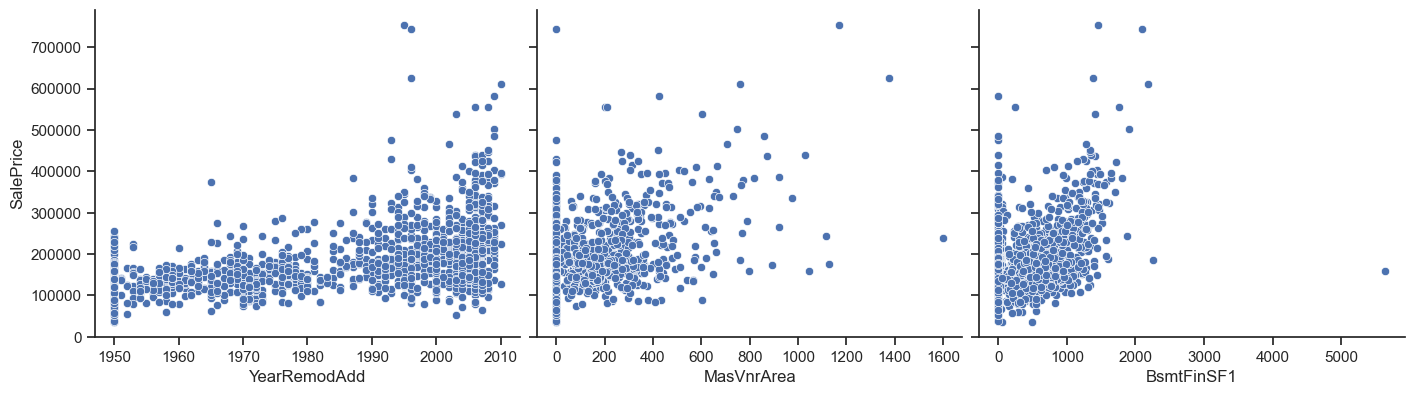

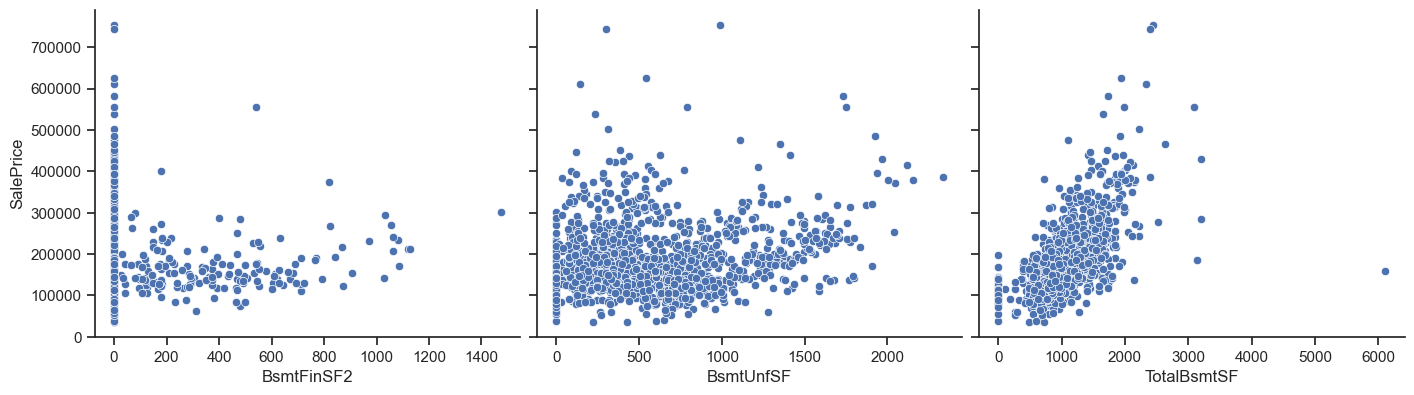

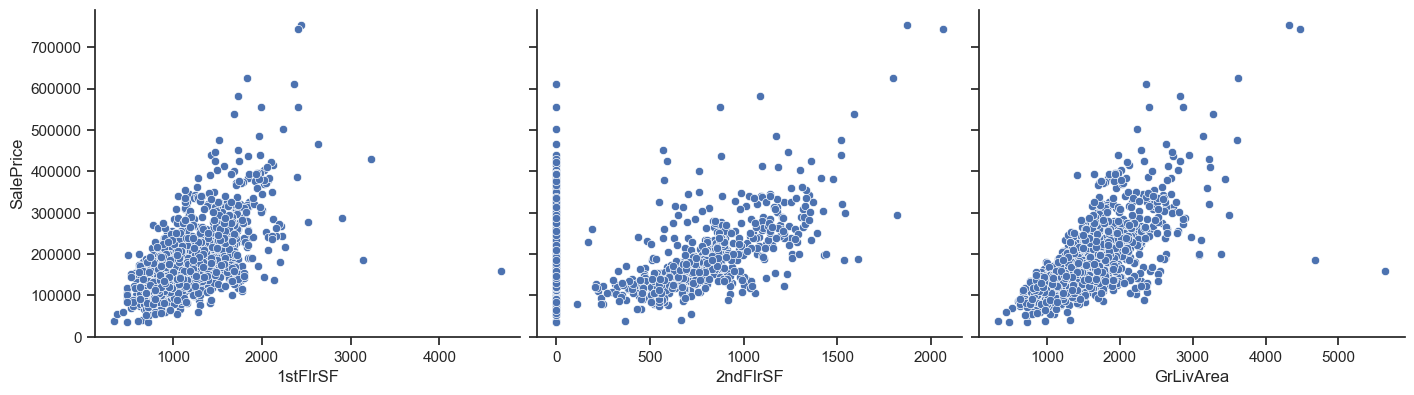

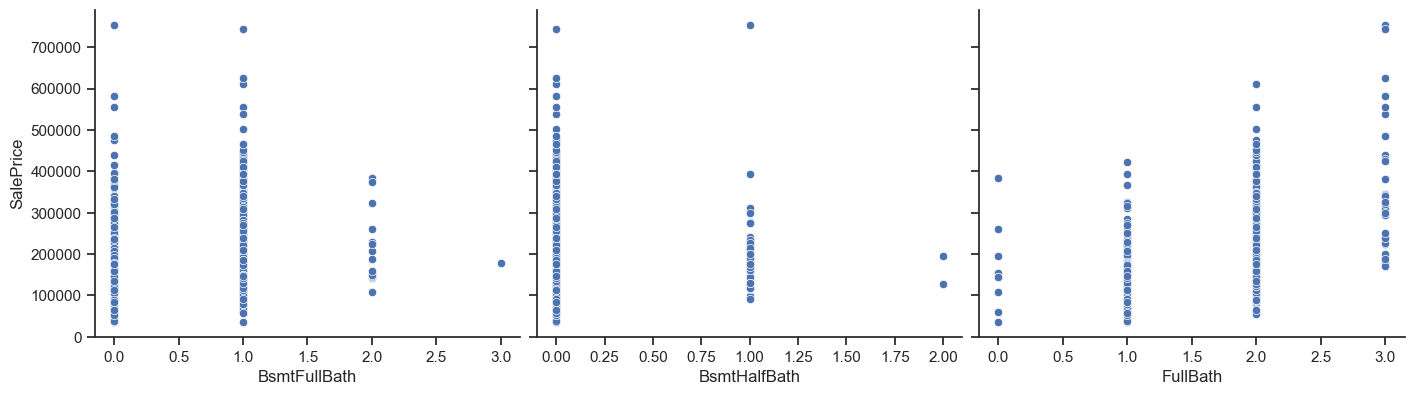

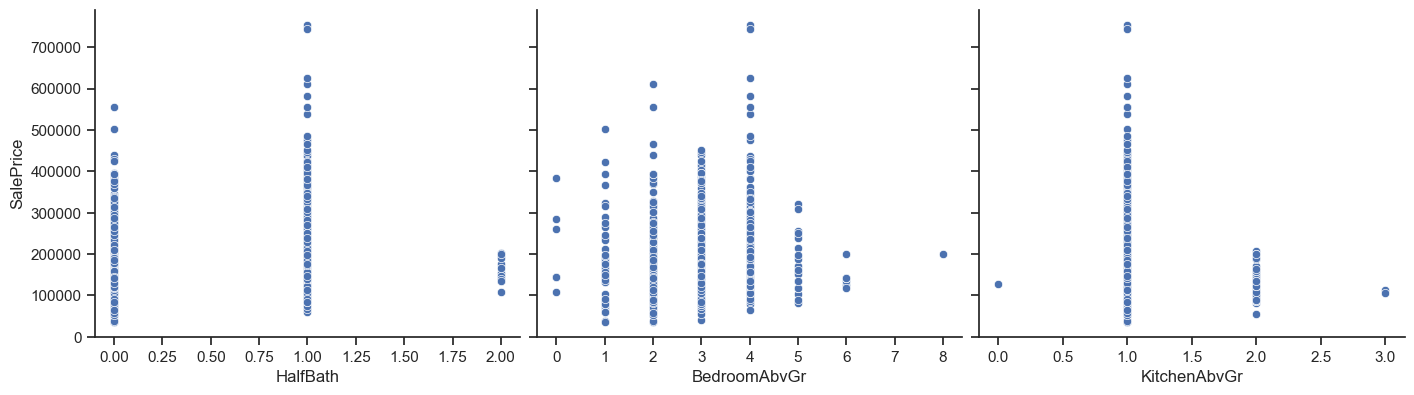

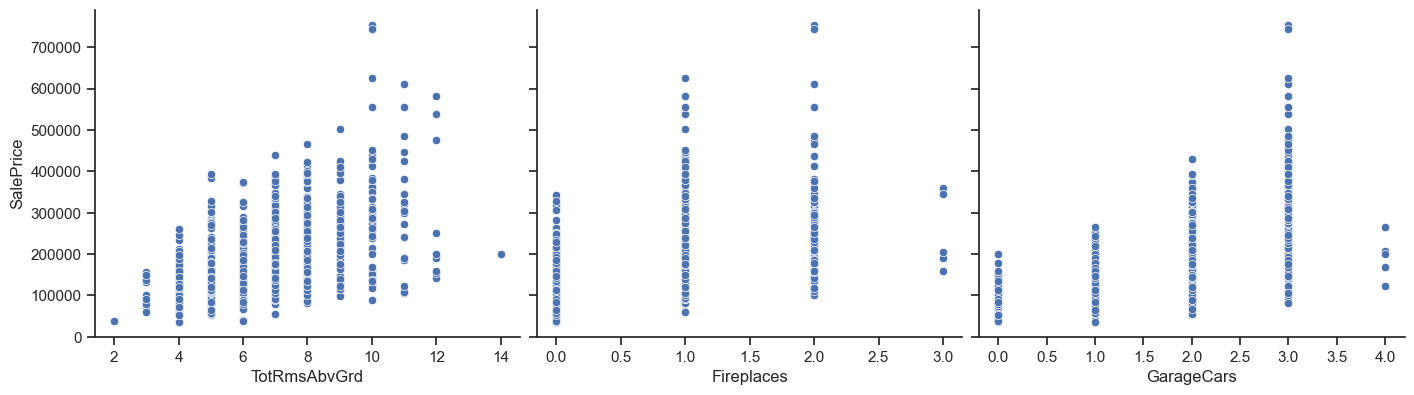

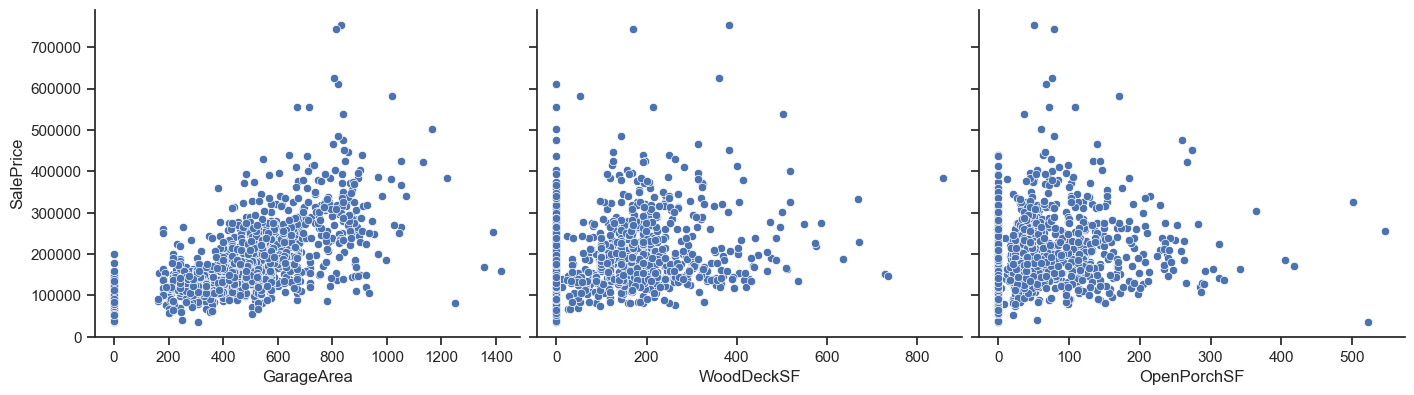

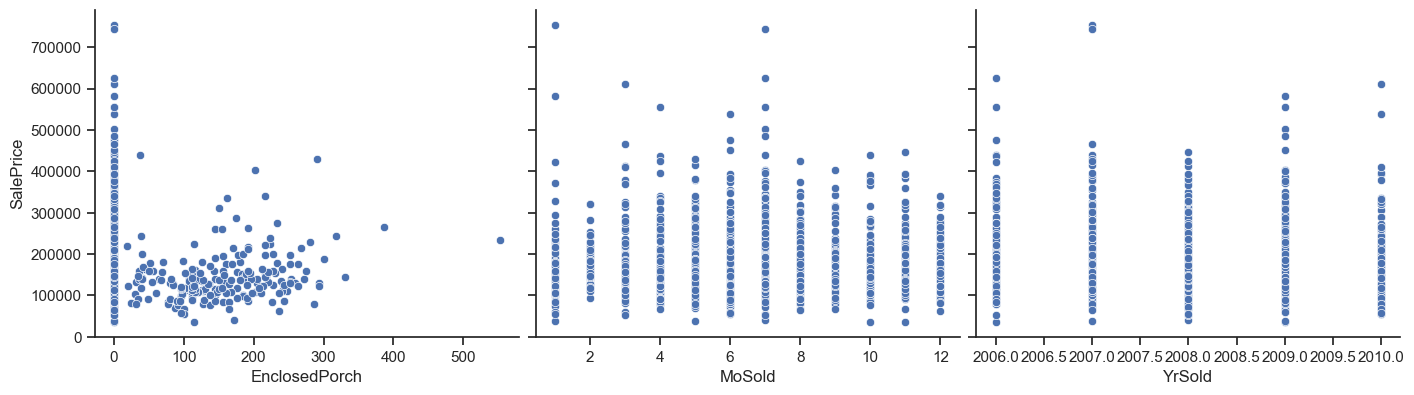

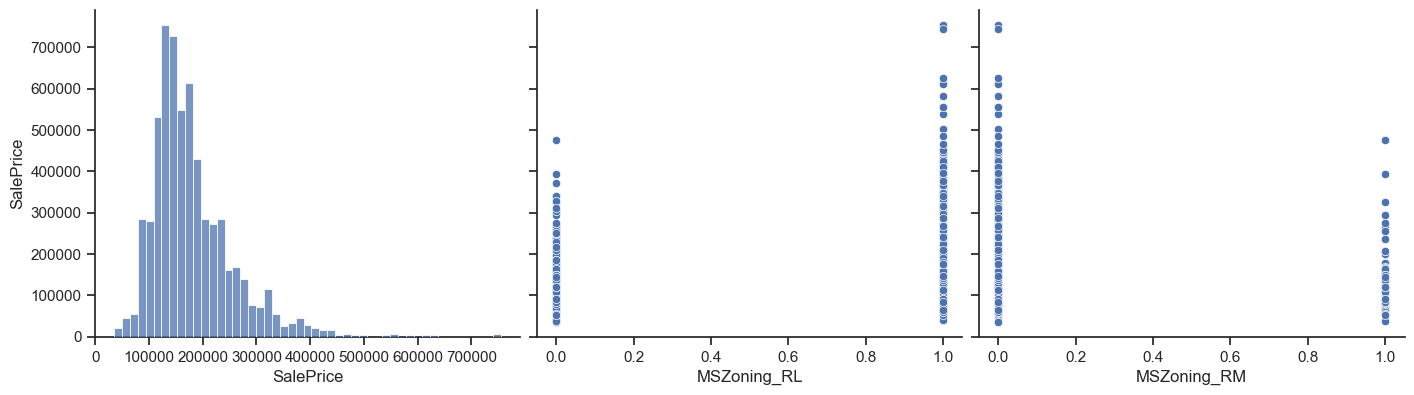

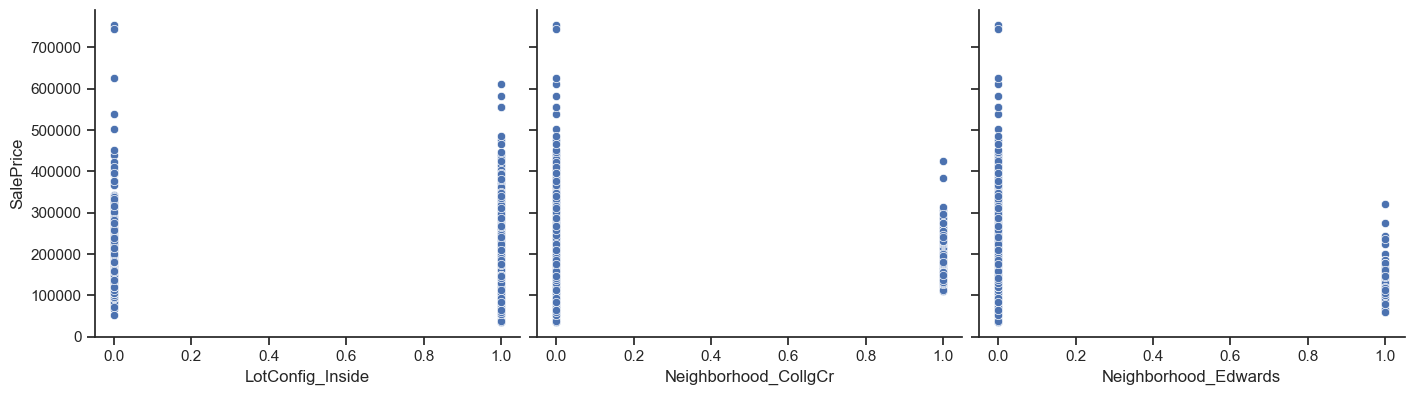

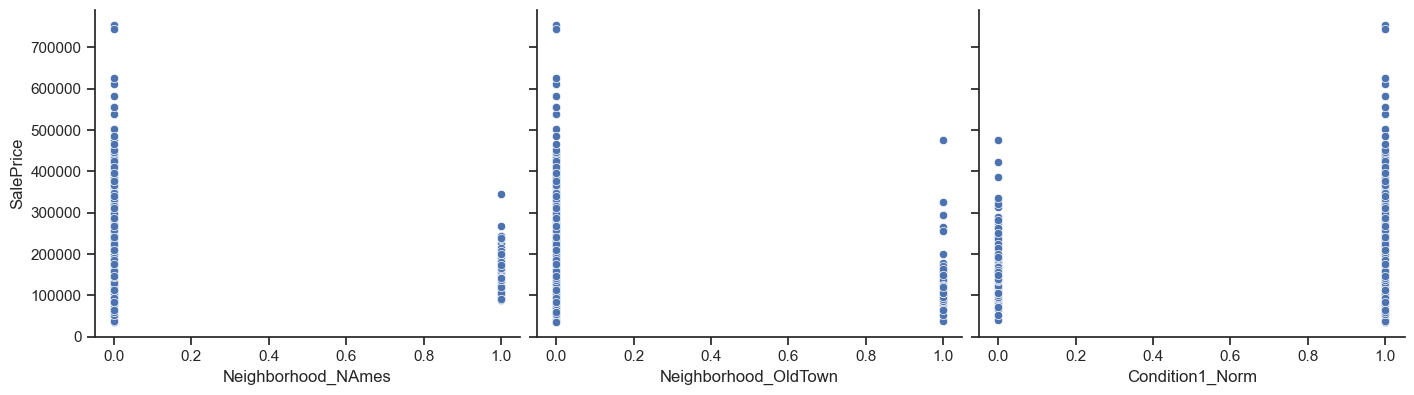

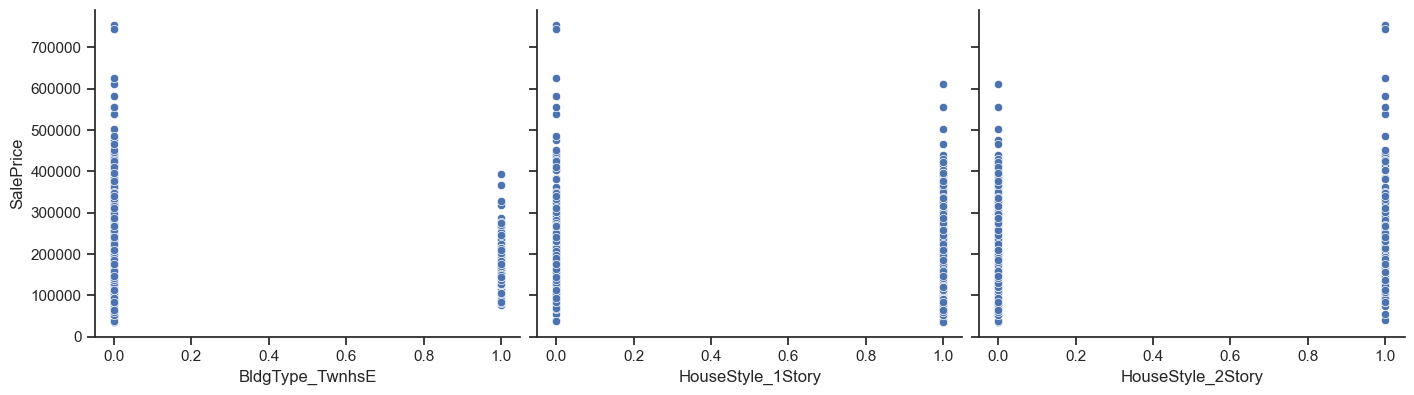

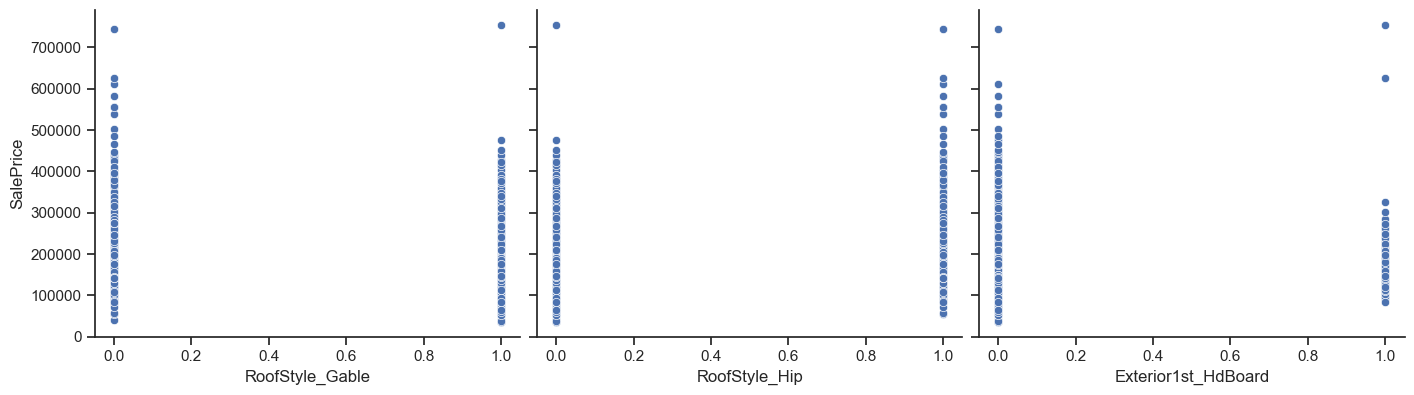

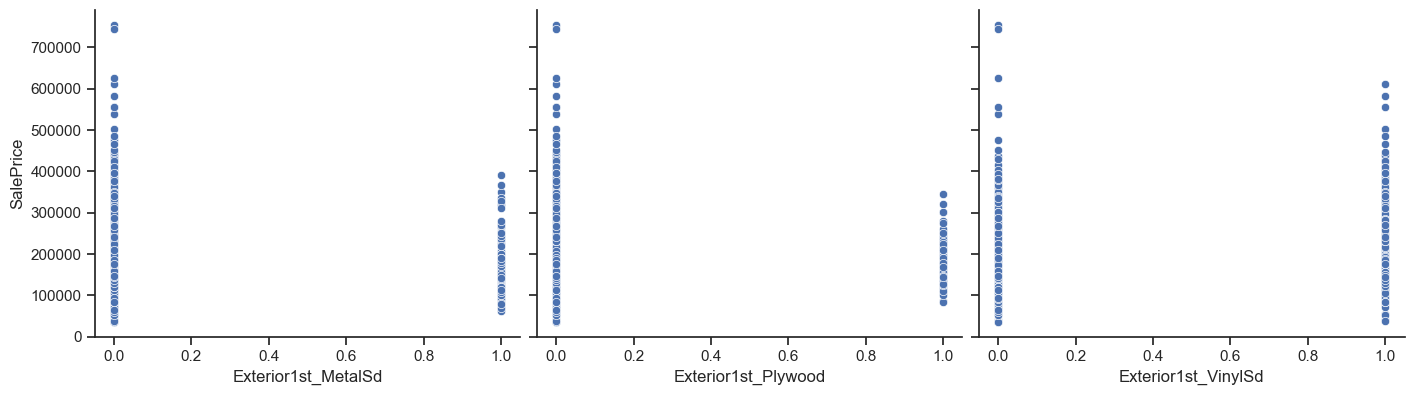

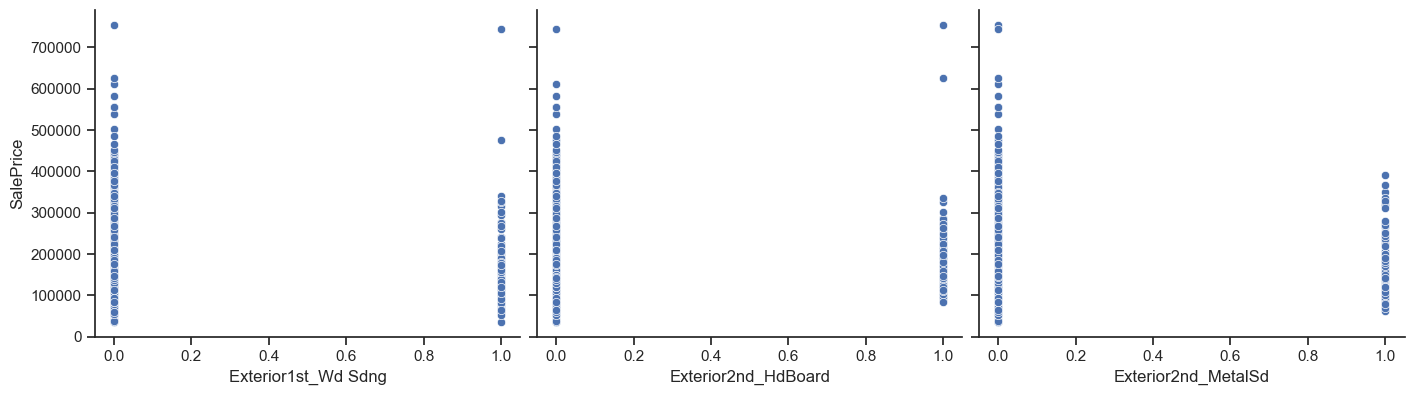

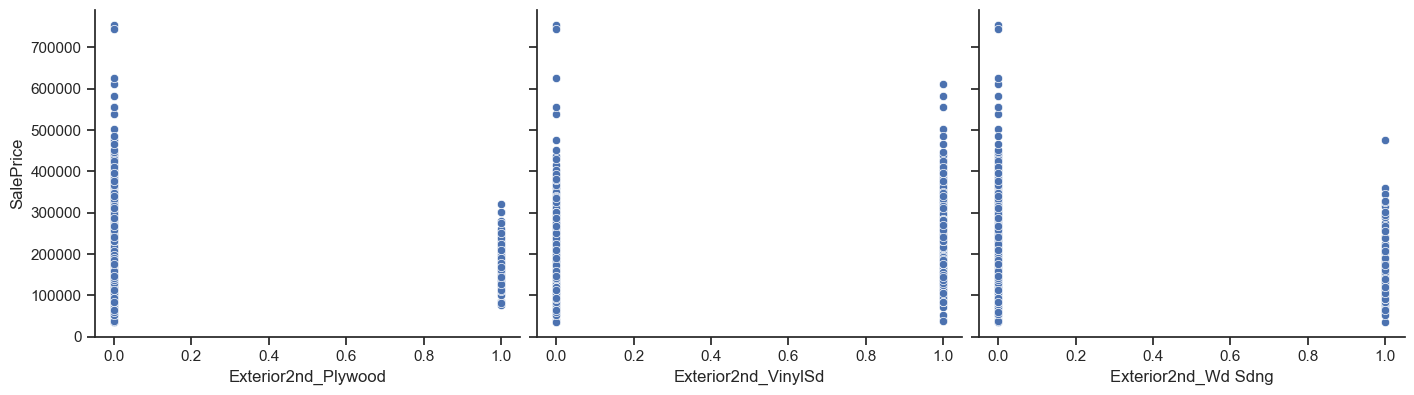

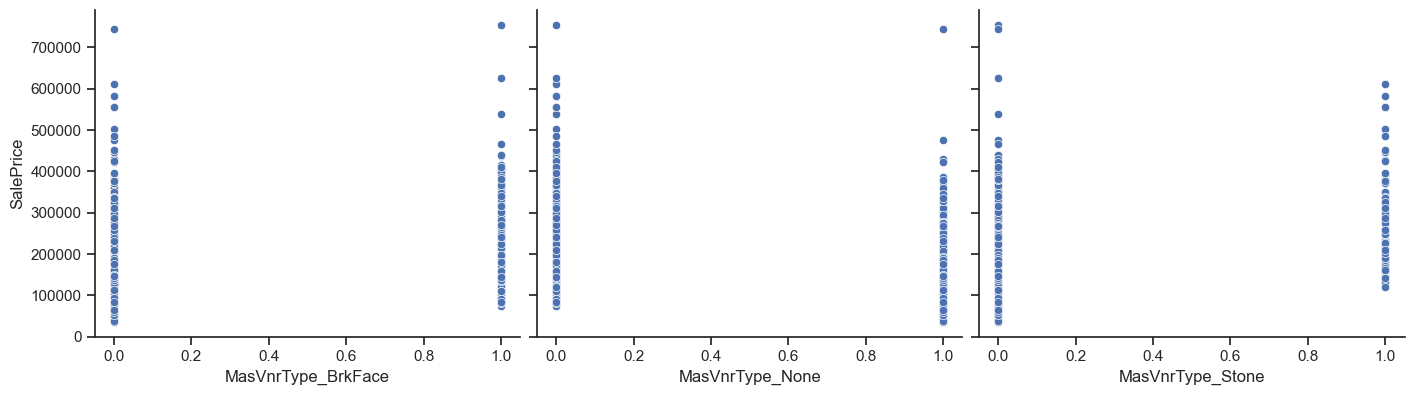

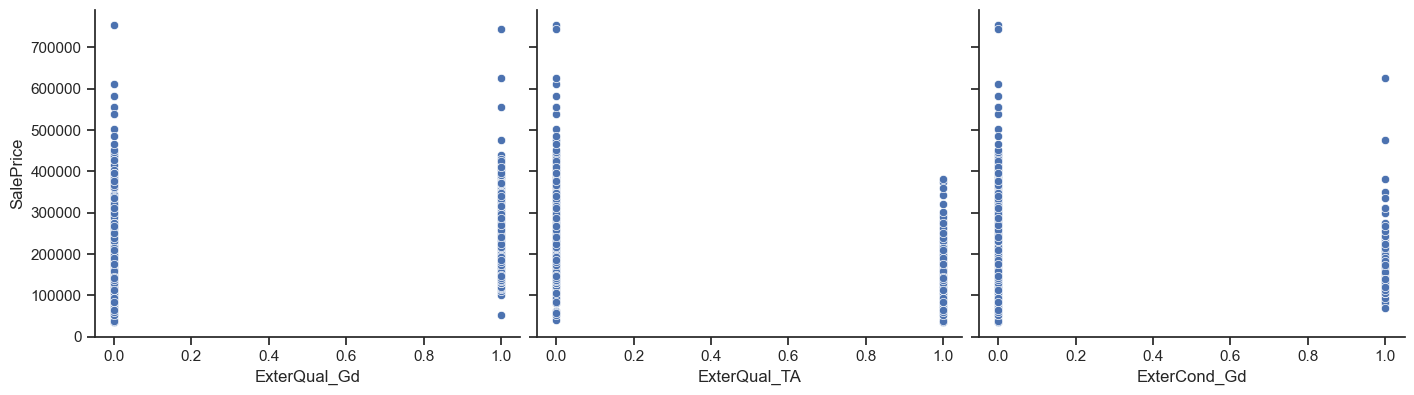

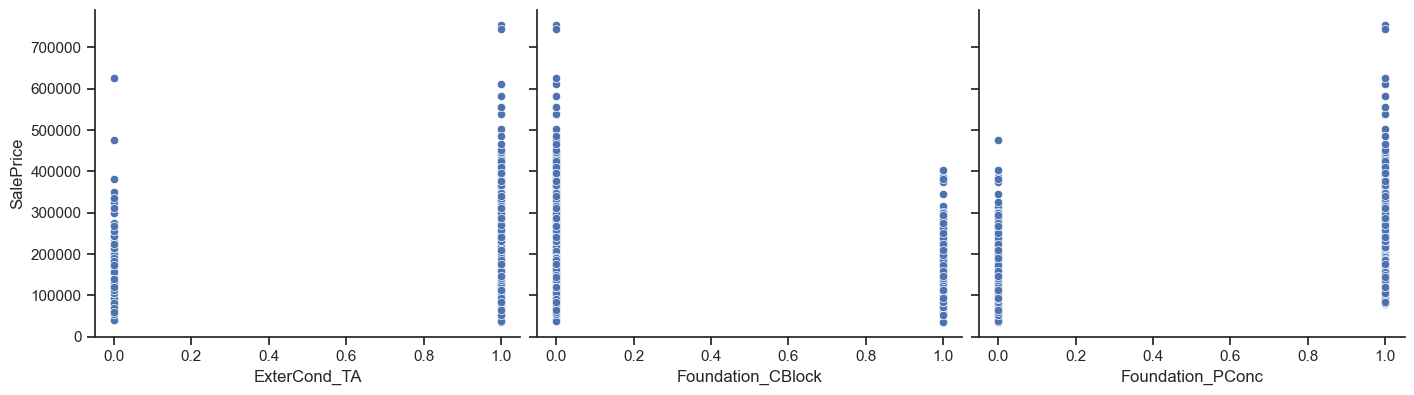

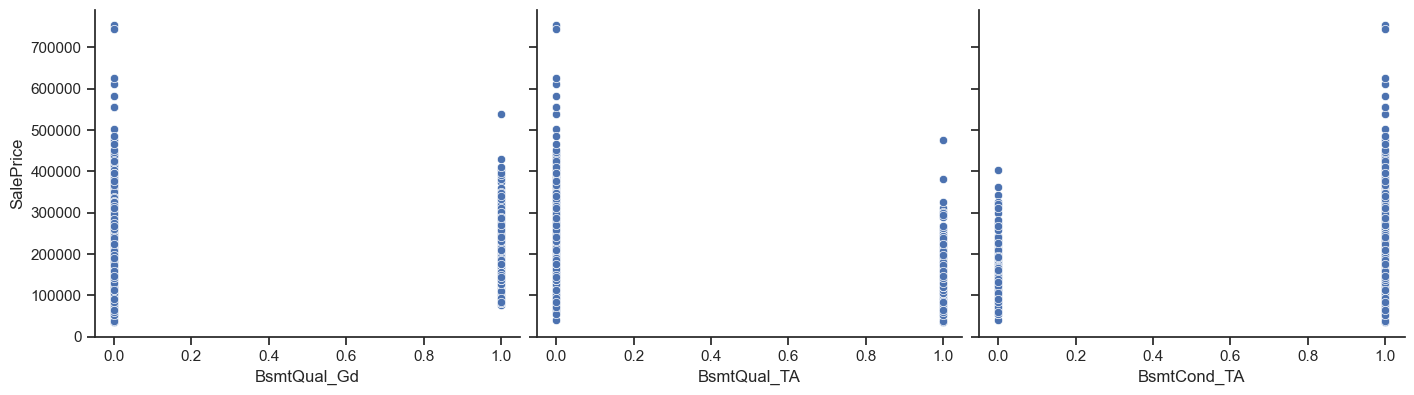

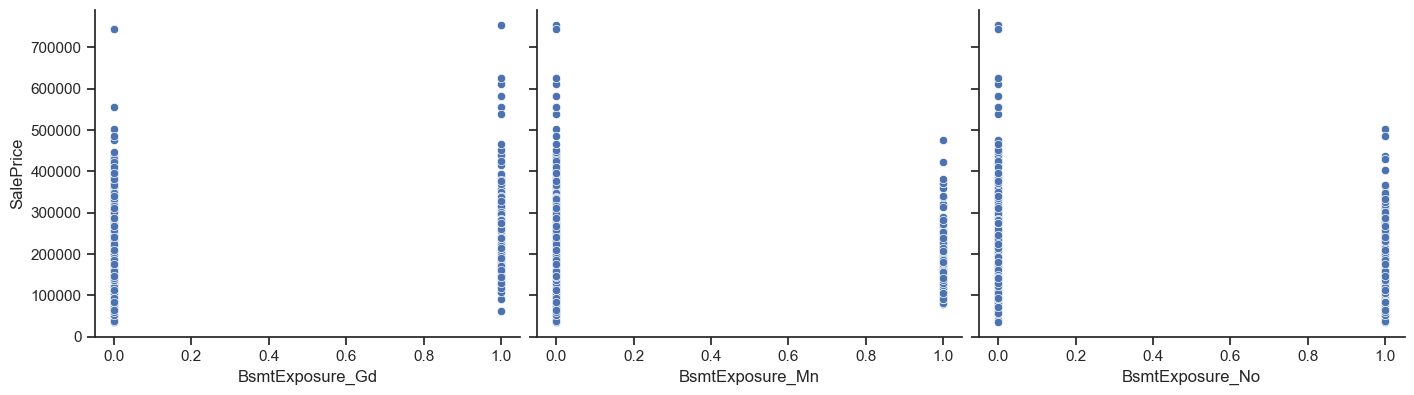

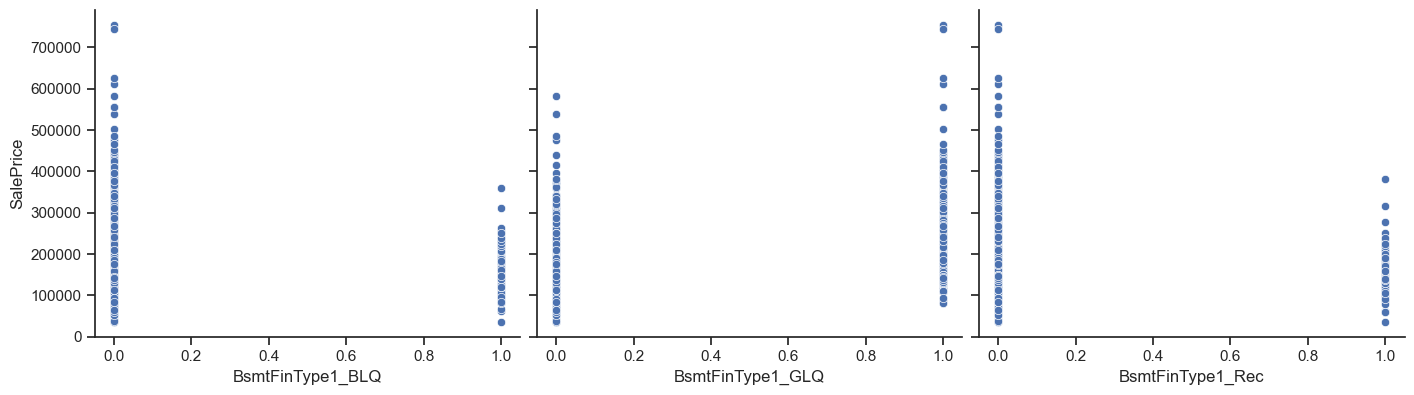

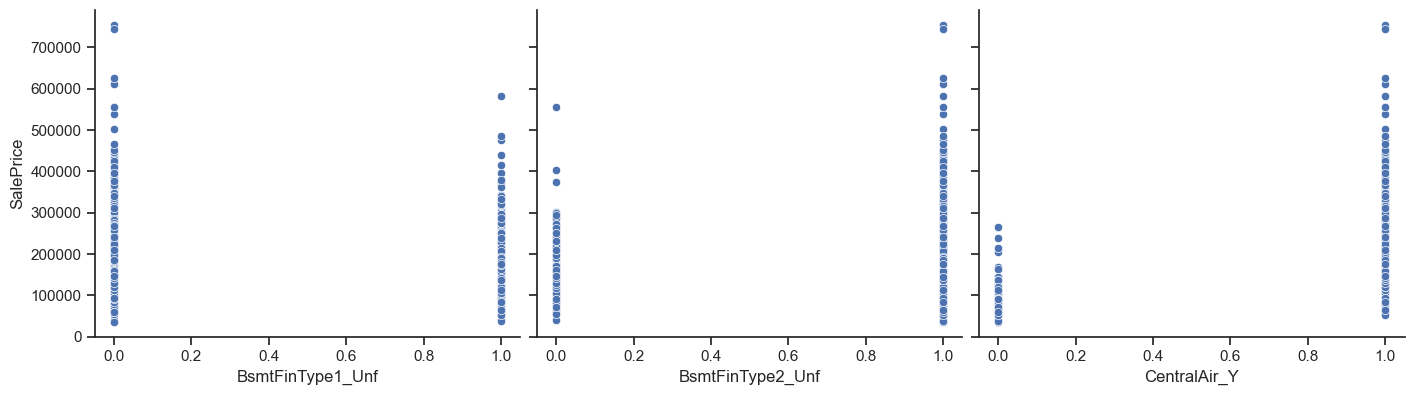

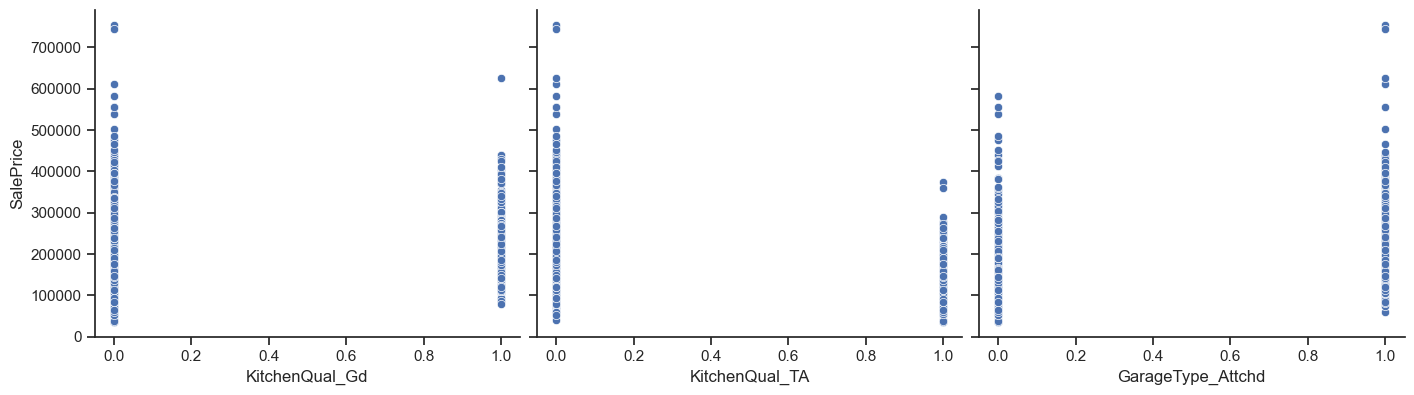

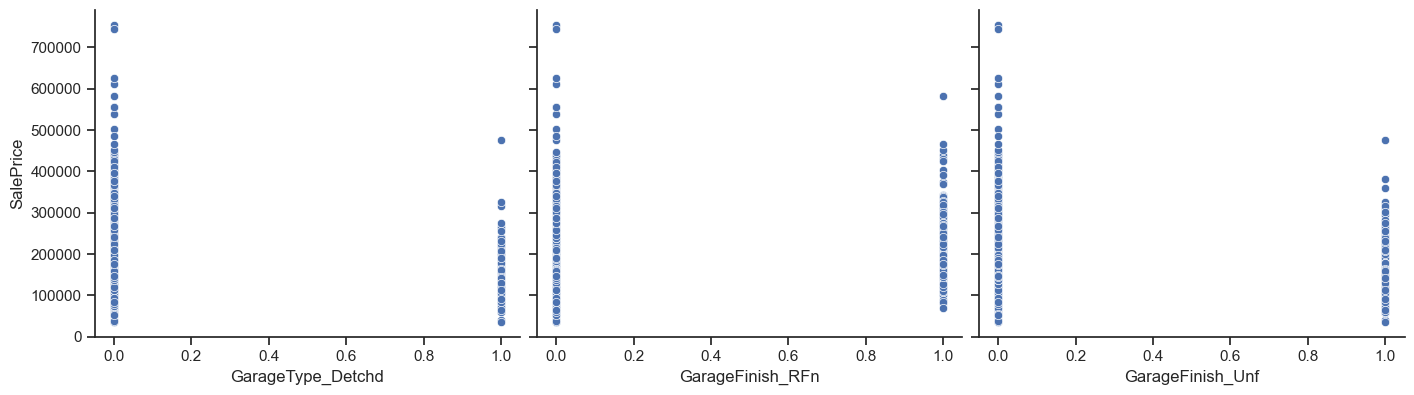

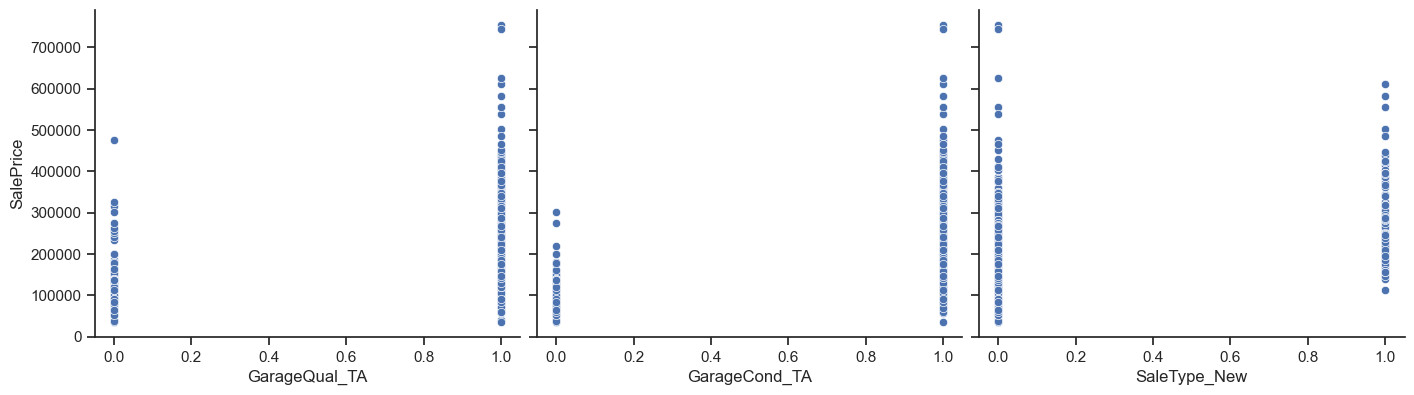

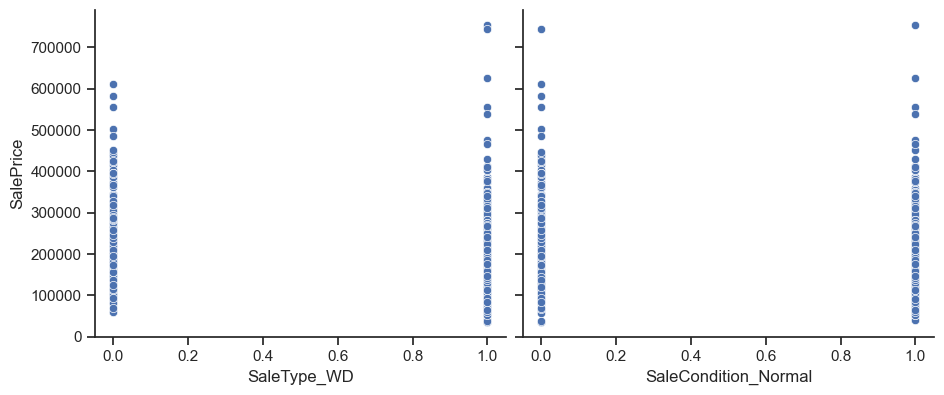

In [1150]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

In [1152]:
# delc=['BsmtFullBath','BsmtHalfBath','HalfBath','KitchenAbvGr','MoSold','YrSold','MSZoning_FV','MSZoning_RH','LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3','LotConfig_Inside','LandSlope_Mod','LandSlope_Sev','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes']
# df=df.drop(delc,axis=1)

#### Checking Distribution of the SalePrice. 

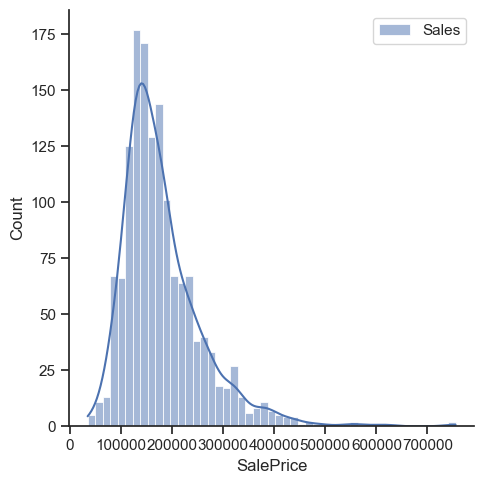

In [1153]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### Creating reusable functions for VIF and OLS

In [1154]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1155]:
#VIF function
def GetVif(train_data):
    vif=pd.DataFrame()
    vif['features']=train_data.columns
    vif['VIF']= [variance_inflation_factor(train_data.values,i)for i in range(train_data.shape[1])]
    vif['VIF']= round(vif.VIF,2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

In [1156]:
#OLS function
def LinRegModel(xTrainData,yTrainData):
    X_train_sm=sm.add_constant(xTrainData)
    lr=sm.OLS(yTrainData,X_train_sm)
    lr_model=lr.fit()
    return lr_model.summary()


#### Checking correraltion again to try and reduce features

In [1158]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
dict1=round(correlation_with_target*100,2)
print(len(dict1))
print(dict1)

87
SalePrice                100.00
OverallQual               79.01
GrLivArea                 71.01
GarageCars                63.97
GarageArea                62.25
TotalBsmtSF               61.33
1stFlrSF                  60.70
FullBath                  56.27
TotRmsAbvGrd              53.64
YearBuilt                 52.33
YearRemodAdd              50.75
Foundation_PConc          49.78
MasVnrArea                47.75
Fireplaces                46.90
ExterQual_Gd              45.66
BsmtFinType1_GLQ          43.35
BsmtFinSF1                38.40
SaleType_New              35.49
SaleCondition_Partial     34.94
GarageType_Attchd         33.57
MasVnrType_Stone          33.33
LotFrontage               32.76
KitchenQual_Gd            32.53
WoodDeckSF                32.47
2ndFlrSF                  32.28
OpenPorchSF               31.12
Exterior2nd_VinylSd       30.49
Exterior1st_VinylSd       30.35
BsmtExposure_Gd           30.25
HalfBath                  28.23
GarageCond_TA             27.61
LotAr

In [1159]:
# Assuming you have the correlations stored in a Pandas Series
correlation_series = round(correlation_with_target * 100, 2)

# Convert the Pandas Series into a dictionary
correlation_dict = correlation_series.to_dict()

selected_ids = []

# Loop through the correlation_dict and filter IDs
for feature, correlation in correlation_dict.items():
    if -30 <= correlation <= 30:
        selected_ids.append(feature)

# The selected_ids list now contains the feature names with correlations between -1 and 30
print(selected_ids)

['HalfBath', 'GarageCond_TA', 'LotArea', 'CentralAir_Y', 'MSZoning_RL', 'GarageQual_TA', 'HouseStyle_2Story', 'RoofStyle_Hip', 'BsmtQual_Gd', 'BsmtFullBath', 'BsmtUnfSF', 'MasVnrType_BrkFace', 'BedroomAbvGr', 'GarageFinish_RFn', 'BsmtFinType2_Unf', 'Condition1_Norm', 'BsmtCond_TA', 'ExterCond_TA', 'Neighborhood_CollgCr', 'MoSold', 'BsmtExposure_Mn', 'BldgType_TwnhsE', 'BsmtFinSF2', 'BsmtHalfBath', 'Exterior1st_Plywood', 'YrSold', 'ExterCond_Gd', 'Exterior2nd_Plywood', 'HouseStyle_1Story', 'Exterior2nd_HdBoard', 'OverallCond', 'BsmtFinType1_Unf', 'MSSubClass', 'LotConfig_Inside', 'Exterior1st_HdBoard', 'EnclosedPorch', 'BsmtFinType1_BLQ', 'BsmtFinType1_Rec', 'KitchenAbvGr', 'SaleCondition_Normal', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior1st_MetalSd', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_OldTown', 'RoofStyle_Gable', 'SaleType_WD', 'BsmtExposure_No', 'MSZoning_RM']


#### Removing features with low correlation to simplify model

In [1160]:
df=df.drop(selected_ids,axis=1)

In [1161]:

correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
dict1=round(correlation_with_target*100,2)
dict1

SalePrice                100.00
OverallQual               79.01
GrLivArea                 71.01
GarageCars                63.97
GarageArea                62.25
TotalBsmtSF               61.33
1stFlrSF                  60.70
FullBath                  56.27
TotRmsAbvGrd              53.64
YearBuilt                 52.33
YearRemodAdd              50.75
Foundation_PConc          49.78
MasVnrArea                47.75
Fireplaces                46.90
ExterQual_Gd              45.66
BsmtFinType1_GLQ          43.35
BsmtFinSF1                38.40
SaleType_New              35.49
SaleCondition_Partial     34.94
GarageType_Attchd         33.57
MasVnrType_Stone          33.33
LotFrontage               32.76
KitchenQual_Gd            32.53
WoodDeckSF                32.47
2ndFlrSF                  32.28
OpenPorchSF               31.12
Exterior2nd_VinylSd       30.49
Exterior1st_VinylSd       30.35
BsmtExposure_Gd           30.25
Foundation_CBlock        -34.24
GarageType_Detchd        -35.40
MasVnrTy

#### Separating Features and Target

In [1162]:
y= df.pop('SalePrice')

X=df

#### Creating test and train data

In [1163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [1168]:
X_train.shape

(1015, 35)

### Model Creation

### We will create a linear regression model and utilize RFE and VIF to Tune the model

In [1164]:
# Instantiate
lm = LinearRegression()

In [1165]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1166]:
print(lm.intercept_)
print(lm.coef_)

-526985.9157919739
[-4.97191859e+01  1.65609886e+04  2.12967350e+01  2.29201871e+02
  4.03477389e+01  1.07986849e+01 -1.52347977e+00  3.32567358e+01
  1.99420987e+01  1.31869435e+01 -1.31291753e+03  2.52310634e+03
  7.54443965e+03  1.85654330e+04 -6.17956128e+00  3.23808682e+01
 -4.88273486e+00  3.06307340e+03  6.03768367e+02  1.28546178e+04
  3.45978420e+03 -2.15989905e+03 -1.06164011e+04  8.31733128e+03
  5.34819111e+03  3.91495383e+03  1.70164914e+04  1.03181075e+04
 -2.59743621e+04 -2.68600636e+04 -4.20746406e+02 -6.39714230e+03
 -2.09450313e+03  5.10507928e+04 -3.44968632e+04]


In [1167]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8130269302698824
0.8256750982810839
1188775561141.473
481267742123.7199
1171207449.400466
1103825096.6140366


In [905]:
X_train.shape

(1015, 57)

#### Using RFE to help with feature selection

In [1169]:
from sklearn.feature_selection import RFE
rfe = RFE(lm, n_features_to_select=35)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=35)

In [1170]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('FullBath', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('Exterior1st_VinylSd', True, 1),
 ('Exterior2nd_VinylSd', True, 1),
 ('MasVnrType_None', True, 1),
 ('MasVnrType_Stone', True, 1),
 ('ExterQual_Gd', True, 1),
 ('ExterQual_TA', True, 1),
 ('Foundation_CBlock', True, 1),
 ('Foundation_PConc', True, 1),
 ('BsmtQual_TA', True, 1),
 ('BsmtExposure_Gd', True, 1),
 ('BsmtFinType1_GLQ', True, 1),
 ('KitchenQual_Gd', True, 1),
 ('KitchenQual_TA', True, 1),
 ('GarageType_Attchd', True, 1),
 ('GarageType_Detchd', True, 1),
 ('GarageFinish_Unf', True, 1),
 ('SaleType_New', True, 1),
 ('SaleCondition_Partial', T

In [1171]:
cols=X_train.columns[rfe.support_]
cols

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Unf', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

#### Removing columns that dont have rfe support

In [1172]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [1173]:
X_train_rfe=X_train[cols]

In [1174]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [1175]:
print(lm.intercept_)
print(lm.coef_)

-526985.9157919739
[-4.97191859e+01  1.65609886e+04  2.12967350e+01  2.29201871e+02
  4.03477389e+01  1.07986849e+01 -1.52347977e+00  3.32567358e+01
  1.99420987e+01  1.31869435e+01 -1.31291753e+03  2.52310634e+03
  7.54443965e+03  1.85654330e+04 -6.17956128e+00  3.23808682e+01
 -4.88273486e+00  3.06307340e+03  6.03768367e+02  1.28546178e+04
  3.45978420e+03 -2.15989905e+03 -1.06164011e+04  8.31733128e+03
  5.34819111e+03  3.91495383e+03  1.70164914e+04  1.03181075e+04
 -2.59743621e+04 -2.68600636e+04 -4.20746406e+02 -6.39714230e+03
 -2.09450313e+03  5.10507928e+04 -3.44968632e+04]


In [1176]:
X_test=X_test[X_train_rfe.columns]

In [1177]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8130269302698824
0.8256750982810839
1188775561141.473
481267742123.7199
1171207449.400466
1103825096.6140366


In [1178]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:39   Log-Likelihood:                -12037.
No. Observations:                1015   AIC:                         2.415e+04
Df Residuals:                     979   BIC:                         2.432e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -5.27e+05   2.04e+05     -2.580      0.010   -9.28e+05   -1.26e+05
LotFrontage             -49.7192     55.933     -0.889      0.374    -159.481      60.042
OverallQual            1.656e+04   1495.026     11.077      0.000    1.36e+04    1.95e+04
YearBuilt                21.2967     79.492      0.268      0.789    -134.698     177.291
YearRemodAdd            229.2019     79.379      2.887      0.004      73.429     384.975
MasVnrArea               40.3477      9.068      4.449      0.000      22.553      58.143
BsmtFinSF1               10.7987      3.472      3.111      0.002       3.986      17.611
TotalBsmtSF              -1.5235      5.387     -0.283      0.777     -12.095       9.048
1stFlrSF                 33.2567     25.513      1.303      0.193     -16.811      83.324
2ndFlrSF                 19.9421     24.966      0.799      0.425     -29.051      68.935
GrLivArea                13.1869     24.781      0.532      0.595     -35.443      61.817
FullBath              -1312.9175   3208.482     -0.409      0.682   -7609.211    4983.376
TotRmsAbvGrd           2523.1063   1301.863      1.938      0.053     -31.656    5077.869
Fireplaces             7544.4396   2146.558      3.515      0.000    3332.055    1.18e+04
GarageCars             1.857e+04   3598.257      5.160      0.000    1.15e+04    2.56e+04
GarageArea               -6.1796     12.189     -0.507      0.612     -30.099      17.740
WoodDeckSF               32.3809      9.800      3.304      0.001      13.150      51.612
OpenPorchSF              -4.8827     17.322     -0.282      0.778     -38.876      29.110
Exterior1st_VinylSd    3063.0734   1.27e+04      0.242      0.809   -2.18e+04    2.79e+04
Exterior2nd_VinylSd     603.7684   1.26e+04      0.048      0.962   -2.42e+04    2.54e+04
MasVnrType_None        1.285e+04   3507.317      3.665      0.000    5971.894    1.97e+04
MasVnrType_Stone       3459.7842   4576.074      0.756      0.450   -5520.258    1.24e+04
ExterQual_Gd          -2159.8990   6697.150     -0.323      0.747   -1.53e+04     1.1e+04
ExterQual_TA          -1.062e+04   7004.081     -1.516      0.130   -2.44e+04    3128.337
Foundation_CBlock      8317.3313   4592.201      1.811      0.070    -694.359    1.73e+04
Foundation_PConc       5348.1911   5219.291      1.025      0.306   -4894.093    1.56e+04
BsmtQual_TA            3914.9538   3431.787      1.141      0.254   -2819.551    1.06e+04
BsmtExposure_Gd        1.702e+04   4278.079      3.978      0.000    8621.232    2.54e+04
BsmtFinType1_GLQ       1.032e+04   3337.895      3.091      0.002    3767.856    1.69e+04
KitchenQual_Gd        -2.597e+04   4684.308     -5.545      0.000   -3.52e+04   -1.68e+04
KitchenQual_TA        -2.686e+04   4941.372     -5.436      0.000   -3.66e+04   -1.72e+04
GarageType_Attchd      

### Going forward we will be removing High Variance fields to further tune the model followed by Linear regression to check performance before we move into Ridge and Lasso Regression

In [1179]:
GetVif(X_train_rfe)

features       VIF
2               YearBuilt  11816.83
3            YearRemodAdd  11649.40
9               GrLivArea   1326.23
7                1stFlrSF    815.49
8                2ndFlrSF    164.47
1             OverallQual     72.29
11           TotRmsAbvGrd     63.69
17    Exterior1st_VinylSd     47.23
18    Exterior2nd_VinylSd     46.52
34  SaleCondition_Partial     43.64
33           SaleType_New     43.55
13             GarageCars     39.76
14             GarageArea     33.54
6             TotalBsmtSF     32.31
22           ExterQual_TA     25.30
10               FullBath     22.98
0             LotFrontage     13.58
21           ExterQual_Gd     12.67
29         KitchenQual_TA     10.10
24       Foundation_PConc      9.24
28         KitchenQual_Gd      7.52
30      GarageType_Attchd      7.39
23      Foundation_CBlock      6.81
19        MasVnrType_None      6.10
31      GarageType_Detchd      5.09
25            BsmtQual_TA      4.03
5              BsmtFinSF1      4.03
32       GarageFinish_Unf      3.64
4              MasVnrArea      3.07
12             Fireplaces      2.98
27       BsmtFinType1_GLQ      2.73
15             WoodDeckSF      1.83
16            OpenPorchSF      1.78
20       MasVnrType_Stone      1.66
26        BsmtExposure_Gd      1.43

In [1180]:
col_drop=['YearBuilt']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_Po

In [1181]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     125.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:05:07   Log-Likelihood:                -12038.
No. Observations:                1015   AIC:                         2.415e+04
Df Residuals:                     980   BIC:                         2.432e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.913e+05   1.55e+05     -3.173      0.002   -7.95e+05   -1.87e+05
LotFrontage             -50.3329     55.859     -0.901      0.368    -159.950      59.285
OverallQual            1.661e+04   1483.925     11.192      0.000    1.37e+04    1.95e+04
YearRemodAdd            232.0138     78.645      2.950      0.003      77.682     386.346
MasVnrArea               40.4197      9.060      4.461      0.000      22.641      58.199
BsmtFinSF1               10.8853      3.455      3.151      0.002       4.105      17.665
TotalBsmtSF              -1.4654      5.380     -0.272      0.785     -12.023       9.093
1stFlrSF                 33.8085     25.418      1.330      0.184     -16.072      83.689
2ndFlrSF                 20.5380     24.855      0.826      0.409     -28.237      69.313
GrLivArea                12.3810     24.586      0.504      0.615     -35.867      60.629
FullBath              -1169.2518   3161.853     -0.370      0.712   -7374.034    5035.530
TotRmsAbvGrd           2514.1933   1300.821      1.933      0.054     -38.522    5066.908
Fireplaces             7487.6050   2135.038      3.507      0.000    3297.833    1.17e+04
GarageCars             1.867e+04   3576.762      5.219      0.000    1.16e+04    2.57e+04
GarageArea               -6.0839     12.178     -0.500      0.617     -29.982      17.814
WoodDeckSF               32.4999      9.785      3.321      0.001      13.298      51.702
OpenPorchSF              -4.9569     17.312     -0.286      0.775     -38.930      29.016
Exterior1st_VinylSd    3315.4218   1.26e+04      0.263      0.793   -2.14e+04    2.81e+04
Exterior2nd_VinylSd     484.3936   1.26e+04      0.038      0.969   -2.43e+04    2.52e+04
MasVnrType_None        1.278e+04   3494.806      3.657      0.000    5922.586    1.96e+04
MasVnrType_Stone       3422.1807   4571.754      0.749      0.454   -5549.373    1.24e+04
ExterQual_Gd          -2082.7202   6687.782     -0.311      0.756   -1.52e+04     1.1e+04
ExterQual_TA          -1.062e+04   7000.756     -1.517      0.130   -2.44e+04    3119.177
Foundation_CBlock      8847.4051   4142.145      2.136      0.033     718.910     1.7e+04
Foundation_PConc       5927.6755   4747.749      1.249      0.212   -3389.249    1.52e+04
BsmtQual_TA            3599.3068   3221.677      1.117      0.264   -2722.872    9921.486
BsmtExposure_Gd        1.695e+04   4269.731      3.971      0.000    8575.326    2.53e+04
BsmtFinType1_GLQ       1.038e+04   3327.175      3.121      0.002    3855.044    1.69e+04
KitchenQual_Gd        -2.593e+04   4679.544     -5.542      0.000   -3.51e+04   -1.67e+04
KitchenQual_TA        -2.677e+04   4927.292     -5.433      0.000   -3.64e+04   -1.71e+04
GarageType_Attchd      -408.5236   3836.442     -0.106      0.915   -7937.110    7120.062
GarageType_Detchd     -

In [1182]:
print(lm.intercept_)
print(lm.coef_)

-526985.9157919739
[-4.97191859e+01  1.65609886e+04  2.12967350e+01  2.29201871e+02
  4.03477389e+01  1.07986849e+01 -1.52347977e+00  3.32567358e+01
  1.99420987e+01  1.31869435e+01 -1.31291753e+03  2.52310634e+03
  7.54443965e+03  1.85654330e+04 -6.17956128e+00  3.23808682e+01
 -4.88273486e+00  3.06307340e+03  6.03768367e+02  1.28546178e+04
  3.45978420e+03 -2.15989905e+03 -1.06164011e+04  8.31733128e+03
  5.34819111e+03  3.91495383e+03  1.70164914e+04  1.03181075e+04
 -2.59743621e+04 -2.68600636e+04 -4.20746406e+02 -6.39714230e+03
 -2.09450313e+03  5.10507928e+04 -3.44968632e+04]


In [1183]:
GetVif(X_train_rfe)

features      VIF
8               GrLivArea  1311.14
6                1stFlrSF   810.79
2            YearRemodAdd   170.63
7                2ndFlrSF   163.32
1             OverallQual    72.21
10           TotRmsAbvGrd    63.68
16    Exterior1st_VinylSd    47.18
17    Exterior2nd_VinylSd    46.46
33  SaleCondition_Partial    43.64
32           SaleType_New    43.53
12             GarageCars    39.62
13             GarageArea    33.52
5             TotalBsmtSF    32.22
21           ExterQual_TA    25.26
9                FullBath    22.86
0             LotFrontage    13.58
20           ExterQual_Gd    12.63
28         KitchenQual_TA     9.93
23       Foundation_PConc     8.49
27         KitchenQual_Gd     7.52
29      GarageType_Attchd     7.38
22      Foundation_CBlock     6.14
18        MasVnrType_None     6.08
30      GarageType_Detchd     5.04
4              BsmtFinSF1     4.02
24            BsmtQual_TA     3.79
31       GarageFinish_Unf     3.64
3              MasVnrArea     3.06
11             Fireplaces     2.97
26       BsmtFinType1_GLQ     2.73
14             WoodDeckSF     1.83
15            OpenPorchSF     1.77
19       MasVnrType_Stone     1.65
25        BsmtExposure_Gd     1.43

In [1184]:
col_drop=['GrLivArea']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_Po

In [1185]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:05:36   Log-Likelihood:                -12038.
No. Observations:                1015   AIC:                         2.414e+04
Df Residuals:                     981   BIC:                         2.431e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.931e+05   1.55e+05     -3.186      0.001   -7.97e+05   -1.89e+05
LotFrontage             -49.4812     55.812     -0.887      0.376    -159.007      60.044
OverallQual            1.663e+04   1482.852     11.213      0.000    1.37e+04    1.95e+04
YearRemodAdd            232.7228     78.603      2.961      0.003      78.474     386.971
MasVnrArea               40.2876      9.053      4.450      0.000      22.523      58.052
BsmtFinSF1               10.8643      3.453      3.146      0.002       4.088      17.641
TotalBsmtSF              -1.5147      5.377     -0.282      0.778     -12.067       9.037
1stFlrSF                 46.0985      7.100      6.492      0.000      32.165      60.032
2ndFlrSF                 32.7730      5.238      6.257      0.000      22.494      43.051
FullBath              -1142.4662   3160.203     -0.362      0.718   -7344.002    5059.069
TotRmsAbvGrd           2613.0541   1285.432      2.033      0.042      90.541    5135.568
Fireplaces             7496.7506   2134.149      3.513      0.000    3308.729    1.17e+04
GarageCars             1.853e+04   3564.730      5.197      0.000    1.15e+04    2.55e+04
GarageArea               -5.9229     12.169     -0.487      0.627     -29.803      17.958
WoodDeckSF               32.4986      9.781      3.323      0.001      13.304      51.693
OpenPorchSF              -4.7366     17.300     -0.274      0.784     -38.685      29.212
Exterior1st_VinylSd    3351.4066   1.26e+04      0.266      0.791   -2.14e+04    2.81e+04
Exterior2nd_VinylSd     398.4462   1.26e+04      0.032      0.975   -2.44e+04    2.52e+04
MasVnrType_None        1.283e+04   3492.117      3.674      0.000    5976.975    1.97e+04
MasVnrType_Stone       3377.8601   4569.168      0.739      0.460   -5588.607    1.23e+04
ExterQual_Gd          -2014.7557   6683.875     -0.301      0.763   -1.51e+04    1.11e+04
ExterQual_TA          -1.068e+04   6996.893     -1.527      0.127   -2.44e+04    3046.321
Foundation_CBlock      8786.2229   4138.788      2.123      0.034     664.327    1.69e+04
Foundation_PConc       5921.1339   4745.925      1.248      0.212   -3392.199    1.52e+04
BsmtQual_TA            3723.8992   3210.940      1.160      0.246   -2577.202       1e+04
BsmtExposure_Gd        1.697e+04   4267.948      3.977      0.000    8597.347    2.53e+04
BsmtFinType1_GLQ       1.042e+04   3325.274      3.133      0.002    3891.525    1.69e+04
KitchenQual_Gd        -2.609e+04   4667.759     -5.589      0.000   -3.52e+04   -1.69e+04
KitchenQual_TA        -2.687e+04   4921.081     -5.461      0.000   -3.65e+04   -1.72e+04
GarageType_Attchd      -429.9895   3834.745     -0.112      0.911   -7955.237    7095.258
GarageType_Detchd     -6446.9427   4759.480     -1.355      0.176   -1.58e+04    2892.991
GarageFinish_Unf      -

In [1186]:
GetVif(X_train_rfe)

features     VIF
2            YearRemodAdd  170.25
1             OverallQual   72.15
6                1stFlrSF   63.35
9            TotRmsAbvGrd   62.24
15    Exterior1st_VinylSd   47.18
16    Exterior2nd_VinylSd   46.46
32  SaleCondition_Partial   43.64
31           SaleType_New   43.53
11             GarageCars   39.39
12             GarageArea   33.50
5             TotalBsmtSF   32.21
20           ExterQual_TA   25.25
8                FullBath   22.85
0             LotFrontage   13.57
19           ExterQual_Gd   12.63
27         KitchenQual_TA    9.91
22       Foundation_PConc    8.49
26         KitchenQual_Gd    7.49
28      GarageType_Attchd    7.38
7                2ndFlrSF    7.26
21      Foundation_CBlock    6.13
17        MasVnrType_None    6.08
29      GarageType_Detchd    5.02
4              BsmtFinSF1    4.02
23            BsmtQual_TA    3.76
30       GarageFinish_Unf    3.64
3              MasVnrArea    3.06
10             Fireplaces    2.97
25       BsmtFinType1_GLQ    2.73
13             WoodDeckSF    1.83
14            OpenPorchSF    1.77
18       MasVnrType_Stone    1.65
24        BsmtExposure_Gd    1.43

In [1187]:
col_drop=['YearRemodAdd']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_Po

In [1188]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:06:13   Log-Likelihood:                -12042.
No. Observations:                1015   AIC:                         2.415e+04
Df Residuals:                     982   BIC:                         2.431e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.681e+04   1.42e+04     -2.593      0.010   -6.47e+04   -8952.005
LotFrontage             -58.7885     55.944     -1.051      0.294    -168.571      50.994
OverallQual            1.725e+04   1473.813     11.702      0.000    1.44e+04    2.01e+04
MasVnrArea               39.5868      9.085      4.357      0.000      21.758      57.416
BsmtFinSF1               11.3226      3.463      3.269      0.001       4.526      18.119
TotalBsmtSF              -2.2487      5.393     -0.417      0.677     -12.831       8.334
1stFlrSF                 46.0474      7.128      6.460      0.000      32.059      60.036
2ndFlrSF                 32.2763      5.256      6.141      0.000      21.963      42.590
FullBath               -259.6082   3158.519     -0.082      0.935   -6457.832    5938.616
TotRmsAbvGrd           2642.5897   1290.466      2.048      0.041     110.201    5174.979
Fireplaces             7147.0997   2139.288      3.341      0.001    2948.998    1.13e+04
GarageCars             1.887e+04   3576.918      5.275      0.000    1.19e+04    2.59e+04
GarageArea               -6.1326     12.217     -0.502      0.616     -30.107      17.842
WoodDeckSF               34.6948      9.792      3.543      0.000      15.480      53.910
OpenPorchSF              -1.9818     17.343     -0.114      0.909     -36.015      32.052
Exterior1st_VinylSd    4999.6281   1.27e+04      0.395      0.693   -1.98e+04    2.98e+04
Exterior2nd_VinylSd     709.8918   1.27e+04      0.056      0.955   -2.41e+04    2.56e+04
MasVnrType_None        1.316e+04   3504.088      3.756      0.000    6285.731       2e+04
MasVnrType_Stone       3537.3425   4586.881      0.771      0.441   -5463.873    1.25e+04
ExterQual_Gd          -1906.2731   6710.152     -0.284      0.776   -1.51e+04    1.13e+04
ExterQual_TA           -1.11e+04   7023.075     -1.581      0.114   -2.49e+04    2679.528
Foundation_CBlock      9726.4981   4142.871      2.348      0.019    1596.601    1.79e+04
Foundation_PConc       7332.9114   4740.545      1.547      0.122   -1969.852    1.66e+04
BsmtQual_TA            3552.4207   3223.087      1.102      0.271   -2772.510    9877.352
BsmtExposure_Gd        1.692e+04   4284.757      3.949      0.000    8513.891    2.53e+04
BsmtFinType1_GLQ       1.106e+04   3331.198      3.321      0.001    4526.112    1.76e+04
KitchenQual_Gd        -2.504e+04   4672.810     -5.359      0.000   -3.42e+04   -1.59e+04
KitchenQual_TA        -2.822e+04   4919.242     -5.737      0.000   -3.79e+04   -1.86e+04
GarageType_Attchd      -715.8261   3848.659     -0.186      0.852   -8268.367    6836.715
GarageType_Detchd     -6658.9871   4777.722     -1.394      0.164    -1.6e+04    2716.732
GarageFinish_Unf      -2712.3299   3249.207     -0.835      0.404   -9088.517    3663.857
SaleType_New           

In [1189]:
GetVif(X_train_rfe)

features    VIF
5                1stFlrSF  63.32
8            TotRmsAbvGrd  58.55
14    Exterior1st_VinylSd  47.08
1             OverallQual  46.51
15    Exterior2nd_VinylSd  46.43
31  SaleCondition_Partial  43.62
30           SaleType_New  43.53
10             GarageCars  39.37
11             GarageArea  33.49
4             TotalBsmtSF  31.77
7                FullBath  22.64
19           ExterQual_TA  18.49
0             LotFrontage  13.40
18           ExterQual_Gd  10.17
26         KitchenQual_TA   9.26
21       Foundation_PConc   7.97
27      GarageType_Attchd   7.38
25         KitchenQual_Gd   7.25
6                2ndFlrSF   6.90
20      Foundation_CBlock   5.55
16        MasVnrType_None   5.48
28      GarageType_Detchd   4.96
3              BsmtFinSF1   4.01
22            BsmtQual_TA   3.66
29       GarageFinish_Unf   3.62
2              MasVnrArea   2.99
9              Fireplaces   2.94
24       BsmtFinType1_GLQ   2.72
12             WoodDeckSF   1.82
13            OpenPorchSF   1.77
17       MasVnrType_Stone   1.65
23        BsmtExposure_Gd   1.43

In [1192]:
col_drop=['1stFlrSF']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_Po

In [1193]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.43e-321
Time:                        17:07:08   Log-Likelihood:                -12063.
No. Observations:                1015   AIC:                         2.419e+04
Df Residuals:                     983   BIC:                         2.435e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -3.49e+04   1.45e+04     -2.409      0.016   -6.33e+04   -6471.485
LotFrontage             -10.6776     56.583     -0.189      0.850    -121.714     100.359
OverallQual            1.764e+04   1502.753     11.739      0.000    1.47e+04    2.06e+04
MasVnrArea               44.3010      9.242      4.794      0.000      26.166      62.437
BsmtFinSF1               12.9231      3.525      3.666      0.000       6.005      19.841
TotalBsmtSF              17.5601      4.527      3.879      0.000       8.677      26.444
2ndFlrSF                 13.2160      4.438      2.978      0.003       4.506      21.926
FullBath               4064.2412   3150.078      1.290      0.197   -2117.409    1.02e+04
TotRmsAbvGrd           6649.9599   1154.776      5.759      0.000    4383.850    8916.070
Fireplaces             9956.9495   2137.551      4.658      0.000    5762.262    1.42e+04
GarageCars             1.798e+04   3647.538      4.928      0.000    1.08e+04    2.51e+04
GarageArea                4.2779     12.359      0.346      0.729     -19.974      28.530
WoodDeckSF               38.9303      9.970      3.905      0.000      19.365      58.495
OpenPorchSF               4.3388     17.670      0.246      0.806     -30.337      39.015
Exterior1st_VinylSd    6608.2905   1.29e+04      0.512      0.609   -1.87e+04    3.19e+04
Exterior2nd_VinylSd   -4197.7627   1.29e+04     -0.325      0.745   -2.95e+04    2.11e+04
MasVnrType_None        1.371e+04   3574.885      3.836      0.000    6697.292    2.07e+04
MasVnrType_Stone       1919.7225   4673.959      0.411      0.681   -7252.361    1.11e+04
ExterQual_Gd            304.1750   6838.841      0.044      0.965   -1.31e+04    1.37e+04
ExterQual_TA          -9425.4102   7162.192     -1.316      0.188   -2.35e+04    4629.533
Foundation_CBlock      4818.4171   4156.115      1.159      0.247   -3337.461     1.3e+04
Foundation_PConc       1369.7522   4745.145      0.289      0.773   -7942.026    1.07e+04
BsmtQual_TA            1591.4108   3274.558      0.486      0.627   -4834.517    8017.339
BsmtExposure_Gd        1.786e+04   4370.087      4.088      0.000    9288.429    2.64e+04
BsmtFinType1_GLQ       1.017e+04   3396.584      2.994      0.003    3505.596    1.68e+04
KitchenQual_Gd        -2.589e+04   4766.738     -5.432      0.000   -3.52e+04   -1.65e+04
KitchenQual_TA        -3.072e+04   5004.554     -6.139      0.000   -4.05e+04   -2.09e+04
GarageType_Attchd     -2779.6754   3914.023     -0.710      0.478   -1.05e+04    4901.125
GarageType_Detchd     -1.112e+04   4824.498     -2.305      0.021   -2.06e+04   -1652.234
GarageFinish_Unf       -847.4545   3302.721     -0.257      0.798   -7328.649    5633.740
SaleType_New           4.675e+04   2.58e+04      1.810      0.071   -3935.617    9.74e+04
SaleCondition_Partial -

In [1194]:
GetVif(X_train_rfe)

features    VIF
13    Exterior1st_VinylSd  47.06
1             OverallQual  46.31
14    Exterior2nd_VinylSd  46.26
7            TotRmsAbvGrd  43.85
30  SaleCondition_Partial  43.62
29           SaleType_New  43.52
9              GarageCars  39.31
10             GarageArea  32.91
6                FullBath  21.60
4             TotalBsmtSF  21.44
18           ExterQual_TA  18.43
0             LotFrontage  13.15
17           ExterQual_Gd  10.12
25         KitchenQual_TA   9.21
20       Foundation_PConc   7.67
26      GarageType_Attchd   7.33
24         KitchenQual_Gd   7.24
15        MasVnrType_None   5.47
19      Foundation_CBlock   5.36
27      GarageType_Detchd   4.86
5                2ndFlrSF   4.57
3              BsmtFinSF1   3.99
21            BsmtQual_TA   3.63
28       GarageFinish_Unf   3.59
2              MasVnrArea   2.97
8              Fireplaces   2.82
23       BsmtFinType1_GLQ   2.72
11             WoodDeckSF   1.82
12            OpenPorchSF   1.77
16       MasVnrType_Stone   1.65
22        BsmtExposure_Gd   1.42

In [1195]:
col_drop=['Exterior1st_VinylSd']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1196]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     133.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.38e-322
Time:                        17:07:39   Log-Likelihood:                -12063.
No. Observations:                1015   AIC:                         2.419e+04
Df Residuals:                     984   BIC:                         2.434e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.457e+04   1.45e+04     -2.390      0.017    -6.3e+04   -6182.871
LotFrontage             -11.9920     56.503     -0.212      0.832    -122.873      98.889
OverallQual            1.762e+04   1501.813     11.735      0.000    1.47e+04    2.06e+04
MasVnrArea               44.2054      9.236      4.786      0.000      26.080      62.330
BsmtFinSF1               12.8671      3.522      3.653      0.000       5.955      19.780
TotalBsmtSF              17.7295      4.513      3.928      0.000       8.873      26.586
2ndFlrSF                 13.4048      4.421      3.032      0.002       4.728      22.081
FullBath               4053.7780   3148.830      1.287      0.198   -2125.416    1.02e+04
TotRmsAbvGrd           6617.2320   1152.573      5.741      0.000    4355.449    8879.015
Fireplaces             9893.9946   2133.210      4.638      0.000    5707.831    1.41e+04
GarageCars             1.803e+04   3644.675      4.947      0.000    1.09e+04    2.52e+04
GarageArea                4.1972     12.353      0.340      0.734     -20.044      28.438
WoodDeckSF               38.8502      9.965      3.899      0.000      19.295      58.405
OpenPorchSF               3.8389     17.637      0.218      0.828     -30.771      38.449
Exterior2nd_VinylSd    2223.0545   3009.594      0.739      0.460   -3682.907    8129.016
MasVnrType_None        1.367e+04   3572.774      3.827      0.000    6663.446    2.07e+04
MasVnrType_Stone       2153.5540   4649.840      0.463      0.643   -6971.189    1.13e+04
ExterQual_Gd            362.8240   6835.317      0.053      0.958   -1.31e+04    1.38e+04
ExterQual_TA          -9421.8340   7159.502     -1.316      0.188   -2.35e+04    4627.813
Foundation_CBlock      4759.0230   4152.937      1.146      0.252   -3390.608    1.29e+04
Foundation_PConc       1316.0146   4742.204      0.278      0.781   -7989.981    1.06e+04
BsmtQual_TA            1596.5812   3273.314      0.488      0.626   -4826.898    8020.060
BsmtExposure_Gd         1.79e+04   4367.948      4.098      0.000    9326.468    2.65e+04
BsmtFinType1_GLQ       1.018e+04   3395.294      2.997      0.003    3513.534    1.68e+04
KitchenQual_Gd        -2.582e+04   4762.838     -5.421      0.000   -3.52e+04   -1.65e+04
KitchenQual_TA        -3.067e+04   5001.533     -6.132      0.000   -4.05e+04   -2.09e+04
GarageType_Attchd     -2790.0447   3912.502     -0.713      0.476   -1.05e+04    4887.763
GarageType_Detchd      -1.12e+04   4820.320     -2.323      0.020   -2.07e+04   -1737.838
GarageFinish_Unf       -869.1524   3301.211     -0.263      0.792   -7347.375    5609.070
SaleType_New           4.688e+04   2.58e+04      1.816      0.070   -3788.674    9.75e+04
SaleCondition_Partial -3.015e+04   2.55e+04     -1.180      0.238   -8.03e+04       2e+04
=======================

In [1197]:
GetVif(X_train_rfe)

features    VIF
1             OverallQual  46.31
7            TotRmsAbvGrd  43.77
29  SaleCondition_Partial  43.62
28           SaleType_New  43.52
9              GarageCars  39.28
10             GarageArea  32.91
6                FullBath  21.60
4             TotalBsmtSF  21.34
17           ExterQual_TA  18.42
0             LotFrontage  13.12
16           ExterQual_Gd  10.11
24         KitchenQual_TA   9.20
19       Foundation_PConc   7.67
25      GarageType_Attchd   7.33
23         KitchenQual_Gd   7.23
14        MasVnrType_None   5.47
18      Foundation_CBlock   5.36
26      GarageType_Detchd   4.85
5                2ndFlrSF   4.55
3              BsmtFinSF1   3.98
20            BsmtQual_TA   3.63
27       GarageFinish_Unf   3.59
2              MasVnrArea   2.97
8              Fireplaces   2.81
22       BsmtFinType1_GLQ   2.72
13    Exterior2nd_VinylSd   2.51
11             WoodDeckSF   1.82
12            OpenPorchSF   1.76
15       MasVnrType_Stone   1.63
21        BsmtExposure_Gd   1.42

In [1198]:
col_drop=['OverallQual']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1199]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.60e-296
Time:                        17:07:57   Log-Likelihood:                -12130.
No. Observations:                1015   AIC:                         2.432e+04
Df Residuals:                     985   BIC:                         2.447e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.566e+04   1.25e+04      5.271      0.000    4.12e+04    9.01e+04
LotFrontage             -39.3413     60.245     -0.653      0.514    -157.565      78.883
MasVnrArea               47.6645      9.851      4.838      0.000      28.333      66.996
BsmtFinSF1                7.8111      3.731      2.094      0.037       0.490      15.132
TotalBsmtSF              31.6371      4.647      6.808      0.000      22.518      40.756
2ndFlrSF                 25.0119      4.599      5.439      0.000      15.987      34.036
FullBath               6237.3017   3354.360      1.859      0.063    -345.211    1.28e+04
TotRmsAbvGrd           6386.5359   1229.774      5.193      0.000    3973.258    8799.813
Fireplaces             1.418e+04   2242.870      6.321      0.000    9774.901    1.86e+04
GarageCars             2.211e+04   3871.659      5.710      0.000    1.45e+04    2.97e+04
GarageArea                4.5370     13.182      0.344      0.731     -21.331      30.405
WoodDeckSF               38.9297     10.634      3.661      0.000      18.062      59.798
OpenPorchSF               8.5534     18.816      0.455      0.650     -28.370      45.477
Exterior2nd_VinylSd    -638.5519   3201.088     -0.199      0.842   -6920.289    5643.185
MasVnrType_None        1.111e+04   3805.495      2.919      0.004    3641.619    1.86e+04
MasVnrType_Stone       6927.4269   4942.987      1.401      0.161   -2772.570    1.66e+04
ExterQual_Gd          -7674.6036   7257.504     -1.057      0.291   -2.19e+04    6567.343
ExterQual_TA          -2.478e+04   7511.450     -3.299      0.001   -3.95e+04      -1e+04
Foundation_CBlock      -628.6855   4404.585     -0.143      0.887   -9272.134    8014.763
Foundation_PConc       1634.2338   5060.498      0.323      0.747   -8296.362    1.16e+04
BsmtQual_TA            -613.4585   3487.287     -0.176      0.860   -7456.825    6229.908
BsmtExposure_Gd        1.989e+04   4657.667      4.271      0.000    1.08e+04     2.9e+04
BsmtFinType1_GLQ       1.623e+04   3581.223      4.531      0.000    9198.953    2.33e+04
KitchenQual_Gd        -3.064e+04   5063.700     -6.050      0.000   -4.06e+04   -2.07e+04
KitchenQual_TA        -3.887e+04   5284.960     -7.355      0.000   -4.92e+04   -2.85e+04
GarageType_Attchd      2059.0048   4151.823      0.496      0.620   -6088.429    1.02e+04
GarageType_Detchd     -1.017e+04   5143.091     -1.977      0.048   -2.03e+04     -76.321
GarageFinish_Unf      -3794.5125   3512.784     -1.080      0.280   -1.07e+04    3098.888
SaleType_New           5.227e+04   2.75e+04      1.897      0.058   -1795.437    1.06e+05
SaleCondition_Partial -3.569e+04   2.73e+04     -1.309      0.191   -8.92e+04    1.78e+04
==============================================================================
Omnibus:                      429.

In [1200]:
GetVif(X_train_rfe)

features    VIF
28  SaleCondition_Partial  43.61
27           SaleType_New  43.50
6            TotRmsAbvGrd  42.06
8              GarageCars  38.60
9              GarageArea  32.90
5                FullBath  21.16
3             TotalBsmtSF  20.12
16           ExterQual_TA  17.81
0             LotFrontage  13.10
15           ExterQual_Gd   9.60
23         KitchenQual_TA   9.19
18       Foundation_PConc   7.40
22         KitchenQual_Gd   7.23
24      GarageType_Attchd   7.22
13        MasVnrType_None   5.33
17      Foundation_CBlock   5.31
25      GarageType_Detchd   4.80
4                2ndFlrSF   4.52
2              BsmtFinSF1   3.93
19            BsmtQual_TA   3.62
26       GarageFinish_Unf   3.58
1              MasVnrArea   2.90
7              Fireplaces   2.76
21       BsmtFinType1_GLQ   2.60
12    Exterior2nd_VinylSd   2.50
10             WoodDeckSF   1.82
11            OpenPorchSF   1.76
14       MasVnrType_Stone   1.60
20        BsmtExposure_Gd   1.42

In [1201]:
col_drop=['SaleCondition_Partial']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1202]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.60e-296
Time:                        17:08:30   Log-Likelihood:                -12131.
No. Observations:                1015   AIC:                         2.432e+04
Df Residuals:                     986   BIC:                         2.446e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.562e+04   1.25e+04      5.266      0.000    4.12e+04    9.01e+04
LotFrontage           -38.7296     60.265     -0.643      0.521    -156.993      79.533
MasVnrArea             47.7558      9.855      4.846      0.000      28.417      67.094
BsmtFinSF1              7.9393      3.731      2.128      0.034       0.618      15.260
TotalBsmtSF            31.5402      4.648      6.786      0.000      22.419      40.662
2ndFlrSF               25.0085      4.600      5.436      0.000      15.981      34.036
FullBath             6237.9977   3355.575      1.859      0.063    -346.891    1.28e+04
TotRmsAbvGrd         6409.0645   1230.099      5.210      0.000    3995.152    8822.977
Fireplaces           1.412e+04   2243.265      6.294      0.000    9717.513    1.85e+04
GarageCars           2.231e+04   3869.925      5.765      0.000    1.47e+04    2.99e+04
GarageArea              3.6868     13.171      0.280      0.780     -22.159      29.533
WoodDeckSF             39.6383     10.624      3.731      0.000      18.790      60.487
OpenPorchSF             8.9270     18.821      0.474      0.635     -28.006      45.860
Exterior2nd_VinylSd  -711.3195   3201.765     -0.222      0.824   -6994.376    5571.737
MasVnrType_None      1.104e+04   3806.543      2.901      0.004    3573.902    1.85e+04
MasVnrType_Stone     6562.2913   4936.902      1.329      0.184   -3125.750    1.63e+04
ExterQual_Gd        -8033.8103   7254.943     -1.107      0.268   -2.23e+04    6203.093
ExterQual_TA        -2.517e+04   7508.162     -3.353      0.001   -3.99e+04   -1.04e+04
Foundation_CBlock    -678.4500   4406.016     -0.154      0.878   -9324.696    7967.796
Foundation_PConc     1623.5329   5062.324      0.321      0.748   -8310.634    1.16e+04
BsmtQual_TA          -666.8333   3488.312     -0.191      0.848   -7512.202    6178.535
BsmtExposure_Gd      1.952e+04   4650.806      4.198      0.000    1.04e+04    2.87e+04
BsmtFinType1_GLQ     1.621e+04   3582.494      4.524      0.000    9178.632    2.32e+04
KitchenQual_Gd      -3.025e+04   5056.942     -5.982      0.000   -4.02e+04   -2.03e+04
KitchenQual_TA      -3.837e+04   5272.833     -7.276      0.000   -4.87e+04    -2.8e+04
GarageType_Attchd    1986.5324   4152.957      0.478      0.633   -6163.118    1.01e+04
GarageType_Detchd   -1.005e+04   5144.120     -1.953      0.051   -2.01e+04      46.904
GarageFinish_Unf    -3929.4041   3512.545     -1.119      0.264   -1.08e+04    2963.518
SaleType_New         1.684e+04   5165.303      3.259      0.001    6698.973     2.7e+04
==============================================================================
Omnibus:                      427.475   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43583.072
Skew:                         

In [1203]:
GetVif(X_train_rfe)

features    VIF
6          TotRmsAbvGrd  42.05
8            GarageCars  38.54
9            GarageArea  32.82
5              FullBath  21.16
3           TotalBsmtSF  20.12
16         ExterQual_TA  17.76
0           LotFrontage  13.10
15         ExterQual_Gd   9.58
23       KitchenQual_TA   9.14
18     Foundation_PConc   7.40
24    GarageType_Attchd   7.22
22       KitchenQual_Gd   7.20
13      MasVnrType_None   5.33
17    Foundation_CBlock   5.31
25    GarageType_Detchd   4.80
4              2ndFlrSF   4.52
2            BsmtFinSF1   3.93
19          BsmtQual_TA   3.62
26     GarageFinish_Unf   3.58
1            MasVnrArea   2.90
7            Fireplaces   2.75
21     BsmtFinType1_GLQ   2.60
12  Exterior2nd_VinylSd   2.50
10           WoodDeckSF   1.81
11          OpenPorchSF   1.76
14     MasVnrType_Stone   1.60
27         SaleType_New   1.52
20      BsmtExposure_Gd   1.42

In [1204]:
col_drop=['TotRmsAbvGrd']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1205]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.44e-292
Time:                        17:09:24   Log-Likelihood:                -12145.
No. Observations:                1015   AIC:                         2.435e+04
Df Residuals:                     987   BIC:                         2.448e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.796e+04   1.19e+04      7.420      0.000    6.47e+04    1.11e+05
LotFrontage            14.1682     60.186      0.235      0.814    -103.938     132.275
MasVnrArea             44.7544      9.967      4.490      0.000      25.195      64.314
BsmtFinSF1              6.2140      3.765      1.650      0.099      -1.174      13.602
TotalBsmtSF            39.6787      4.435      8.946      0.000      30.975      48.383
2ndFlrSF               38.5813      3.842     10.043      0.000      31.043      46.120
FullBath             1.151e+04   3241.696      3.550      0.000    5145.039    1.79e+04
Fireplaces           1.468e+04   2270.138      6.468      0.000    1.02e+04    1.91e+04
GarageCars           2.351e+04   3913.922      6.006      0.000    1.58e+04    3.12e+04
GarageArea              2.0485     13.340      0.154      0.878     -24.130      28.227
WoodDeckSF             42.1782     10.753      3.923      0.000      21.078      63.279
OpenPorchSF             3.8927     19.043      0.204      0.838     -33.477      41.262
Exterior2nd_VinylSd  -323.7713   3243.021     -0.100      0.920   -6687.779    6040.236
MasVnrType_None      9621.9340   3846.708      2.501      0.013    2073.267    1.72e+04
MasVnrType_Stone     7368.3988   4999.408      1.474      0.141   -2442.292    1.72e+04
ExterQual_Gd        -1.157e+04   7318.154     -1.581      0.114   -2.59e+04    2789.828
ExterQual_TA        -2.734e+04   7595.245     -3.600      0.000   -4.22e+04   -1.24e+04
Foundation_CBlock   -2864.2582   4443.712     -0.645      0.519   -1.16e+04    5855.950
Foundation_PConc    -1525.7368   5092.246     -0.300      0.765   -1.15e+04    8467.136
BsmtQual_TA          1335.1989   3512.706      0.380      0.704   -5558.032    8228.430
BsmtExposure_Gd      1.905e+04   4711.091      4.043      0.000    9801.646    2.83e+04
BsmtFinType1_GLQ      1.55e+04   3627.016      4.273      0.000    8382.293    2.26e+04
KitchenQual_Gd      -3.182e+04   5114.449     -6.221      0.000   -4.19e+04   -2.18e+04
KitchenQual_TA      -3.904e+04   5340.583     -7.311      0.000   -4.95e+04   -2.86e+04
GarageType_Attchd    1114.6885   4204.188      0.265      0.791   -7135.485    9364.862
GarageType_Detchd   -1.168e+04   5202.183     -2.244      0.025   -2.19e+04   -1467.482
GarageFinish_Unf    -3338.4465   3556.909     -0.939      0.348   -1.03e+04    3641.527
SaleType_New         1.666e+04   5233.164      3.184      0.001    6393.408    2.69e+04
==============================================================================
Omnibus:                      482.393   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48128.614
Skew:                          -1.213   Prob(JB):                         0.00
Kurtosis:                      36.647  

In [1206]:
GetVif(X_train_rfe)

features    VIF
7            GarageCars  38.17
8            GarageArea  32.79
5              FullBath  18.03
15         ExterQual_TA  17.34
3           TotalBsmtSF  17.30
0           LotFrontage  12.44
14         ExterQual_Gd   9.50
22       KitchenQual_TA   9.11
17     Foundation_PConc   7.40
23    GarageType_Attchd   7.21
21       KitchenQual_Gd   7.20
12      MasVnrType_None   5.32
16    Foundation_CBlock   5.31
24    GarageType_Detchd   4.80
2            BsmtFinSF1   3.89
25     GarageFinish_Unf   3.57
18          BsmtQual_TA   3.50
4              2ndFlrSF   3.18
1            MasVnrArea   2.90
6            Fireplaces   2.75
20     BsmtFinType1_GLQ   2.60
11  Exterior2nd_VinylSd   2.50
9            WoodDeckSF   1.80
10          OpenPorchSF   1.75
13     MasVnrType_Stone   1.59
26         SaleType_New   1.52
19      BsmtExposure_Gd   1.42

In [1207]:
col_drop=['GarageCars']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1208]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     120.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.27e-285
Time:                        17:10:03   Log-Likelihood:                -12163.
No. Observations:                1015   AIC:                         2.438e+04
Df Residuals:                     988   BIC:                         2.451e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.657e+04    1.2e+04      8.064      0.000    7.31e+04     1.2e+05
LotFrontage             2.2161     61.211      0.036      0.971    -117.903     122.335
MasVnrArea             43.7929     10.141      4.318      0.000      23.892      63.694
BsmtFinSF1              4.3422      3.818      1.137      0.256      -3.150      11.835
TotalBsmtSF            38.1348      4.506      8.463      0.000      29.293      46.977
2ndFlrSF               38.8818      3.909      9.947      0.000      31.211      46.553
FullBath             1.374e+04   3276.883      4.194      0.000    7313.430    2.02e+04
Fireplaces           1.669e+04   2285.006      7.303      0.000    1.22e+04    2.12e+04
GarageArea             65.3064      8.332      7.838      0.000      48.956      81.657
WoodDeckSF             42.5951     10.942      3.893      0.000      21.124      64.067
OpenPorchSF            -3.9976     19.332     -0.207      0.836     -41.934      33.939
Exterior2nd_VinylSd   649.3955   3295.963      0.197      0.844   -5818.496    7117.287
MasVnrType_None      7561.1644   3898.792      1.939      0.053     -89.701    1.52e+04
MasVnrType_Stone     7942.2521   5086.447      1.561      0.119   -2039.229    1.79e+04
ExterQual_Gd        -1.094e+04   7446.165     -1.470      0.142   -2.56e+04    3667.641
ExterQual_TA        -2.828e+04   7727.252     -3.660      0.000   -4.34e+04   -1.31e+04
Foundation_CBlock   -2858.5003   4521.902     -0.632      0.527   -1.17e+04    6015.135
Foundation_PConc      -73.1820   5176.001     -0.014      0.989   -1.02e+04    1.01e+04
BsmtQual_TA         -1556.3345   3540.786     -0.440      0.660   -8504.659    5391.990
BsmtExposure_Gd      2.172e+04   4772.578      4.551      0.000    1.24e+04    3.11e+04
BsmtFinType1_GLQ     1.537e+04   3690.769      4.164      0.000    8126.548    2.26e+04
KitchenQual_Gd      -3.202e+04   5204.324     -6.153      0.000   -4.22e+04   -2.18e+04
KitchenQual_TA      -3.847e+04   5433.689     -7.080      0.000   -4.91e+04   -2.78e+04
GarageType_Attchd    4704.7876   4234.705      1.111      0.267   -3605.261     1.3e+04
GarageType_Detchd   -8091.6359   5258.770     -1.539      0.124   -1.84e+04    2228.007
GarageFinish_Unf    -2527.8718   3616.890     -0.699      0.485   -9625.540    4569.796
SaleType_New         1.672e+04   5325.238      3.139      0.002    6266.814    2.72e+04
==============================================================================
Omnibus:                      559.286   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69587.826
Skew:                          -1.522   Prob(JB):                         0.00
Kurtosis:                      43.449   Cond. No.                     1.61e+04
================================================

In [1230]:
# Adding Features back
X_train_rfe['2ndFlrSF']=X_train['2ndFlrSF']

In [1210]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.55e-298
Time:                        17:11:28   Log-Likelihood:                -12130.
No. Observations:                1015   AIC:                         2.432e+04
Df Residuals:                     987   BIC:                         2.445e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.493e+04   1.19e+04      6.293      0.000    5.16e+04    9.83e+04
LotFrontage           -93.6074     60.473     -1.548      0.122    -212.277      25.062
MasVnrArea             40.3292      9.835      4.101      0.000      21.030      59.628
BsmtFinSF1              3.8608      3.700      1.044      0.297      -3.399      11.121
TotalBsmtSF             7.9762      5.738      1.390      0.165      -3.284      19.237
2ndFlrSF               51.1928      4.081     12.545      0.000      43.185      59.201
FullBath             4602.1831   3369.490      1.366      0.172   -2010.004    1.12e+04
Fireplaces           1.282e+04   2264.762      5.660      0.000    8373.851    1.73e+04
GarageArea             54.2363      8.187      6.624      0.000      38.170      70.303
WoodDeckSF             35.6689     10.635      3.354      0.001      14.799      56.539
OpenPorchSF            -7.7961     18.735     -0.416      0.677     -44.562      28.970
Exterior2nd_VinylSd  4435.4177   3227.294      1.374      0.170   -1897.728    1.08e+04
MasVnrType_None      8035.7335   3777.750      2.127      0.034     622.389    1.54e+04
MasVnrType_Stone     9079.5050   4929.940      1.842      0.066    -594.863    1.88e+04
ExterQual_Gd        -1.076e+04   7214.159     -1.491      0.136   -2.49e+04    3398.598
ExterQual_TA        -2.827e+04   7486.449     -3.776      0.000    -4.3e+04   -1.36e+04
Foundation_CBlock    4794.9073   4481.765      1.070      0.285   -3999.976    1.36e+04
Foundation_PConc     9410.4072   5149.627      1.827      0.068    -695.069    1.95e+04
BsmtQual_TA          -654.0179   3432.254     -0.191      0.849   -7389.372    6081.336
BsmtExposure_Gd      2.089e+04   4624.987      4.516      0.000    1.18e+04       3e+04
BsmtFinType1_GLQ      1.68e+04   3580.130      4.693      0.000    9776.515    2.38e+04
KitchenQual_Gd      -2.973e+04   5050.068     -5.887      0.000   -3.96e+04   -1.98e+04
KitchenQual_TA      -3.477e+04   5284.154     -6.580      0.000   -4.51e+04   -2.44e+04
GarageType_Attchd    7703.6797   4119.418      1.870      0.062    -380.144    1.58e+04
GarageType_Detchd   -1542.5280   5158.677     -0.299      0.765   -1.17e+04    8580.707
GarageFinish_Unf    -5112.7915   3518.685     -1.453      0.147    -1.2e+04    1792.172
SaleType_New         1.855e+04   5164.236      3.591      0.000    8412.914    2.87e+04
1stFlrSF               55.0370      6.796      8.098      0.000      41.700      68.374
==============================================================================
Omnibus:                      665.257   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90038.820
Skew:                          -2.039   Prob(JB):                         0.00
Kurtosis:                      48.961  

In [1211]:
col_drop=['BsmtFinSF1']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1212]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     131.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.12e-298
Time:                        17:12:26   Log-Likelihood:                -12131.
No. Observations:                1015   AIC:                         2.432e+04
Df Residuals:                     988   BIC:                         2.445e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.406e+04   1.19e+04      6.235      0.000    5.07e+04    9.74e+04
LotFrontage           -93.9362     60.475     -1.553      0.121    -212.610      24.737
MasVnrArea             41.0785      9.809      4.188      0.000      21.830      60.327
TotalBsmtSF             9.5659      5.533      1.729      0.084      -1.291      20.423
2ndFlrSF               51.4806      4.072     12.644      0.000      43.490      59.471
FullBath             4094.2817   3334.307      1.228      0.220   -2448.855    1.06e+04
Fireplaces           1.296e+04   2261.006      5.730      0.000    8519.107    1.74e+04
GarageArea             54.5871      8.181      6.673      0.000      38.533      70.641
WoodDeckSF             36.1120     10.627      3.398      0.001      15.258      56.966
OpenPorchSF            -7.3312     18.731     -0.391      0.696     -44.088      29.426
Exterior2nd_VinylSd  4043.9147   3205.560      1.262      0.207   -2246.573    1.03e+04
MasVnrType_None      8272.3717   3771.108      2.194      0.028     872.069    1.57e+04
MasVnrType_Stone     9499.2876   4913.724      1.933      0.053    -143.247    1.91e+04
ExterQual_Gd        -1.079e+04   7214.421     -1.496      0.135   -2.49e+04    3367.756
ExterQual_TA        -2.788e+04   7477.215     -3.728      0.000   -4.25e+04   -1.32e+04
Foundation_CBlock    5291.1980   4456.664      1.187      0.235   -3454.416     1.4e+04
Foundation_PConc     9342.3320   5149.446      1.814      0.070    -762.776    1.94e+04
BsmtQual_TA          -797.2832   3429.662     -0.232      0.816   -7527.542    5932.976
BsmtExposure_Gd      2.156e+04   4579.543      4.709      0.000    1.26e+04    3.06e+04
BsmtFinType1_GLQ     1.844e+04   3218.237      5.730      0.000    1.21e+04    2.48e+04
KitchenQual_Gd      -2.994e+04   5046.467     -5.932      0.000   -3.98e+04      -2e+04
KitchenQual_TA      -3.481e+04   5284.274     -6.587      0.000   -4.52e+04   -2.44e+04
GarageType_Attchd    8083.9979   4103.451      1.970      0.049      31.517    1.61e+04
GarageType_Detchd   -1282.3214   5152.880     -0.249      0.804   -1.14e+04    8829.525
GarageFinish_Unf    -5311.8196   3513.671     -1.512      0.131   -1.22e+04    1583.297
SaleType_New          1.83e+04   5159.196      3.548      0.000    8179.349    2.84e+04
1stFlrSF               55.1510      6.796      8.116      0.000      41.815      68.487
==============================================================================
Omnibus:                      633.777   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81355.308
Skew:                          -1.889   Prob(JB):                         0.00
Kurtosis:                      46.697   Cond. No.                     2.07e+04
================================================

In [1213]:
col_drop=['Exterior2nd_VinylSd']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1214]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.09e-299
Time:                        17:12:55   Log-Likelihood:                -12132.
No. Observations:                1015   AIC:                         2.432e+04
Df Residuals:                     989   BIC:                         2.444e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.538e+04   1.18e+04      6.370      0.000    5.22e+04    9.86e+04
LotFrontage         -88.9831     60.365     -1.474      0.141    -207.441      29.475
MasVnrArea           41.4574      9.807      4.227      0.000      22.212      60.702
TotalBsmtSF          10.0936      5.518      1.829      0.068      -0.735      20.923
2ndFlrSF             51.1762      4.066     12.587      0.000      43.198      59.155
FullBath           4252.7730   3332.935      1.276      0.202   -2287.664    1.08e+04
Fireplaces         1.272e+04   2254.078      5.644      0.000    8299.005    1.71e+04
GarageArea           55.3318      8.162      6.779      0.000      39.315      71.349
WoodDeckSF           35.5542     10.621      3.348      0.001      14.712      56.397
OpenPorchSF          -6.9496     18.734     -0.371      0.711     -43.713      29.814
MasVnrType_None    8102.6668   3769.835      2.149      0.032     704.873    1.55e+04
MasVnrType_Stone   9789.3792   4909.808      1.994      0.046     154.542    1.94e+04
ExterQual_Gd      -1.017e+04   7199.699     -1.412      0.158   -2.43e+04    3960.964
ExterQual_TA      -2.768e+04   7477.812     -3.701      0.000   -4.24e+04    -1.3e+04
Foundation_CBlock  4975.8274   4450.977      1.118      0.264   -3758.616    1.37e+04
Foundation_PConc   1.044e+04   5076.260      2.058      0.040     483.369    2.04e+04
BsmtQual_TA        -962.7960   3428.176     -0.281      0.779   -7690.131    5764.539
BsmtExposure_Gd    2.128e+04   4575.284      4.651      0.000    1.23e+04    3.03e+04
BsmtFinType1_GLQ   1.839e+04   3218.915      5.712      0.000    1.21e+04    2.47e+04
KitchenQual_Gd    -2.966e+04   5043.341     -5.882      0.000   -3.96e+04   -1.98e+04
KitchenQual_TA     -3.47e+04   5285.117     -6.565      0.000   -4.51e+04   -2.43e+04
GarageType_Attchd  7853.7524   4100.616      1.915      0.056    -193.155    1.59e+04
GarageType_Detchd -1822.2887   5136.607     -0.355      0.723   -1.19e+04    8257.613
GarageFinish_Unf  -5635.4578   3505.341     -1.608      0.108   -1.25e+04    1243.303
SaleType_New       1.871e+04   5150.799      3.632      0.000    8599.578    2.88e+04
1stFlrSF             53.8843      6.723      8.015      0.000      40.691      67.077
==============================================================================
Omnibus:                      642.492   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82883.713
Skew:                          -1.933   Prob(JB):                         0.00
Kurtosis:                      47.101   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

In [1215]:
col_drop=['BsmtQual_TA']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1216]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     142.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.81e-300
Time:                        17:13:34   Log-Likelihood:                -12132.
No. Observations:                1015   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.444e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               7.47e+04   1.16e+04      6.453      0.000     5.2e+04    9.74e+04
LotFrontage         -89.9572     60.237     -1.493      0.136    -208.164      28.250
MasVnrArea           41.5584      9.796      4.242      0.000      22.335      60.782
TotalBsmtSF           9.8878      5.467      1.809      0.071      -0.840      20.616
2ndFlrSF             51.0941      4.053     12.605      0.000      43.140      59.048
FullBath           4462.6776   3246.543      1.375      0.170   -1908.218    1.08e+04
Fireplaces         1.273e+04   2252.955      5.649      0.000    8306.360    1.71e+04
GarageArea           55.5837      8.109      6.855      0.000      39.671      71.496
WoodDeckSF           35.6605     10.609      3.361      0.001      14.841      56.480
OpenPorchSF          -7.0054     18.724     -0.374      0.708     -43.749      29.738
MasVnrType_None    8154.4517   3763.571      2.167      0.030     768.959    1.55e+04
MasVnrType_Stone   9796.6910   4907.454      1.996      0.046     166.484    1.94e+04
ExterQual_Gd      -1.007e+04   7188.164     -1.401      0.162   -2.42e+04    4034.721
ExterQual_TA      -2.773e+04   7471.943     -3.711      0.000   -4.24e+04   -1.31e+04
Foundation_CBlock  4839.2928   4422.289      1.094      0.274   -3838.844    1.35e+04
Foundation_PConc    1.06e+04   5042.281      2.103      0.036     708.967    2.05e+04
BsmtExposure_Gd    2.137e+04   4562.495      4.683      0.000    1.24e+04    3.03e+04
BsmtFinType1_GLQ   1.854e+04   3167.660      5.854      0.000    1.23e+04    2.48e+04
KitchenQual_Gd    -2.967e+04   5040.904     -5.886      0.000   -3.96e+04   -1.98e+04
KitchenQual_TA    -3.469e+04   5282.469     -6.566      0.000   -4.51e+04   -2.43e+04
GarageType_Attchd  7857.3632   4098.688      1.917      0.056    -185.750    1.59e+04
GarageType_Detchd -1918.3635   5122.819     -0.374      0.708    -1.2e+04    8134.467
GarageFinish_Unf  -5723.2745   3489.742     -1.640      0.101   -1.26e+04    1124.867
SaleType_New       1.879e+04   5140.219      3.655      0.000    8701.885    2.89e+04
1stFlrSF             53.9368      6.717      8.029      0.000      40.755      67.119
==============================================================================
Omnibus:                      640.502   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82206.090
Skew:                          -1.924   Prob(JB):                         0.00
Kurtosis:                      46.920   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinear

In [1217]:
col_drop=['GarageType_Detchd']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1221]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.33e-302
Time:                        17:15:13   Log-Likelihood:                -12132.
No. Observations:                1015   AIC:                         2.431e+04
Df Residuals:                     992   BIC:                         2.442e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.379e+04   1.13e+04      6.505      0.000    5.15e+04     9.6e+04
LotFrontage         -87.0254     59.902     -1.453      0.147    -204.575      30.524
MasVnrArea           41.5518      9.752      4.261      0.000      22.414      60.689
TotalBsmtSF           9.4088      5.383      1.748      0.081      -1.155      19.972
2ndFlrSF             50.9881      3.945     12.926      0.000      43.247      58.729
FullBath           4501.1039   3241.851      1.388      0.165   -1860.568    1.09e+04
Fireplaces         1.273e+04   2250.444      5.657      0.000    8315.386    1.71e+04
GarageArea           54.5013      7.750      7.032      0.000      39.292      69.710
WoodDeckSF           36.0859     10.564      3.416      0.001      15.355      56.817
MasVnrType_None    8059.0847   3749.237      2.150      0.032     701.739    1.54e+04
MasVnrType_Stone   9795.7949   4902.706      1.998      0.046     174.929    1.94e+04
ExterQual_Gd      -1.008e+04   7154.296     -1.409      0.159   -2.41e+04    3956.050
ExterQual_TA      -2.777e+04   7442.042     -3.732      0.000   -4.24e+04   -1.32e+04
Foundation_CBlock  5078.4143   4359.014      1.165      0.244   -3475.533    1.36e+04
Foundation_PConc   1.085e+04   4989.930      2.174      0.030    1057.347    2.06e+04
BsmtExposure_Gd    2.147e+04   4550.264      4.718      0.000    1.25e+04    3.04e+04
BsmtFinType1_GLQ   1.856e+04   3160.158      5.874      0.000    1.24e+04    2.48e+04
KitchenQual_Gd    -2.984e+04   5026.477     -5.936      0.000   -3.97e+04      -2e+04
KitchenQual_TA    -3.477e+04   5275.630     -6.590      0.000   -4.51e+04   -2.44e+04
GarageType_Attchd  8909.4292   3051.504      2.920      0.004    2921.285    1.49e+04
GarageFinish_Unf  -6209.0272   3109.524     -1.997      0.046   -1.23e+04    -107.028
SaleType_New       1.879e+04   5118.628      3.670      0.000    8741.942    2.88e+04
1stFlrSF             54.2481      6.635      8.176      0.000      41.227      67.269
==============================================================================
Omnibus:                      643.260   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82961.283
Skew:                          -1.937   Prob(JB):                         0.00
Kurtosis:                      47.121   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1222]:
col_drop=['MasVnrType_None']
# Drop columns from X_train
X_train_rfe = X_train_rfe.drop(col_drop, axis=1)

# Drop corresponding rows from y_train
y_train = y_train.loc[X_train_rfe.index]
#BsmtCond_Po,GarageQual_PoTotRmsAbvGrd

In [1223]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     161.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.02e-302
Time:                        17:16:00   Log-Likelihood:                -12134.
No. Observations:                1015   AIC:                         2.431e+04
Df Residuals:                     993   BIC:                         2.442e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.213e+04   1.07e+04      7.691      0.000    6.12e+04    1.03e+05
LotFrontage         -76.7452     59.820     -1.283      0.200    -194.133      40.642
MasVnrArea           28.4297      7.619      3.731      0.000      13.478      43.381
TotalBsmtSF          10.0744      5.384      1.871      0.062      -0.491      20.640
2ndFlrSF             51.6293      3.940     13.103      0.000      43.897      59.362
FullBath           4096.6219   3242.279      1.264      0.207   -2265.884    1.05e+04
Fireplaces          1.27e+04   2254.497      5.633      0.000    8276.461    1.71e+04
GarageArea           53.3342      7.745      6.886      0.000      38.135      68.533
WoodDeckSF           36.9986     10.575      3.499      0.000      16.247      57.751
MasVnrType_Stone   6581.7775   4677.641      1.407      0.160   -2597.419    1.58e+04
ExterQual_Gd      -1.095e+04   7155.866     -1.531      0.126    -2.5e+04    3089.816
ExterQual_TA      -2.838e+04   7450.256     -3.809      0.000    -4.3e+04   -1.38e+04
Foundation_CBlock  3796.7028   4325.903      0.878      0.380   -4692.259    1.23e+04
Foundation_PConc   1.016e+04   4988.781      2.037      0.042     373.516       2e+04
BsmtExposure_Gd    2.201e+04   4551.552      4.836      0.000    1.31e+04    3.09e+04
BsmtFinType1_GLQ   1.819e+04   3161.035      5.753      0.000     1.2e+04    2.44e+04
KitchenQual_Gd    -3.039e+04   5028.908     -6.044      0.000   -4.03e+04   -2.05e+04
KitchenQual_TA     -3.51e+04   5282.961     -6.644      0.000   -4.55e+04   -2.47e+04
GarageType_Attchd  8275.9995   3042.774      2.720      0.007    2304.995    1.42e+04
GarageFinish_Unf  -5599.5234   3102.208     -1.805      0.071   -1.17e+04     488.113
SaleType_New       1.936e+04   5120.986      3.780      0.000    9310.584    2.94e+04
1stFlrSF             53.9648      6.646      8.120      0.000      40.923      67.007
==============================================================================
Omnibus:                      624.801   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79652.507
Skew:                          -1.844   Prob(JB):                         0.00
Kurtosis:                      46.241   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1224]:
GetVif(X_train_rfe)

features    VIF
20           1stFlrSF  44.69
2         TotalBsmtSF  26.99
4            FullBath  19.62
10       ExterQual_TA  15.65
0         LotFrontage  12.66
6          GarageArea  11.23
16     KitchenQual_TA   8.96
9        ExterQual_Gd   8.83
12   Foundation_PConc   7.13
15     KitchenQual_Gd   7.09
11  Foundation_CBlock   5.13
17  GarageType_Attchd   3.86
3            2ndFlrSF   3.39
5          Fireplaces   2.78
18   GarageFinish_Unf   2.66
14   BsmtFinType1_GLQ   2.06
1          MasVnrArea   1.82
7          WoodDeckSF   1.80
19       SaleType_New   1.49
8    MasVnrType_Stone   1.45
13    BsmtExposure_Gd   1.36

#### Considering the above as final featuers as removing any other column is affecting Accuracy drastically

In [1231]:
X_test.shape
X_train_rfe.shape
y_train = y_train.loc[X_train_rfe.index]
y_test = y_test.loc[X_test.index]
print(X_train_rfe.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 21)
(436, 35)
(1015,)
(436,)


In [1232]:
X_test=X_test[X_train_rfe.columns]

In [1233]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [1234]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7738421037941672
0.804889220337815
1437912852138.1782
538652386814.0476
1416662908.5105205
1235441254.1606596


### Ridge 

In [1235]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1236]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1237]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[   -52.6411619      38.02645286     19.01300231   2782.54809698
  10286.66365571     63.19082255     42.90072775   6323.1439741
   1644.91742529 -11877.40458842  -2053.54867214   7218.96751654
  10050.19379795  13469.09624631  -7614.67271237 -12432.62524496
   4670.96819922  -7274.67761251   9548.77534986     57.80899425
     53.31950747]


In [1238]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7588699854786752
0.7921967736307524
1533105643151.6987
573693078697.4312
1510448909.5090628
1315809813.5262182


### Using Ridge we are getting a Test Accuracy of 79.21% and a Train Accuracy of 75.8% which is withing the acceptable limit of within 5 %


### Lasso 

In [1239]:
X_test=X_test[X_train_rfe.columns]

In [1240]:
X_test.shape
X_train_rfe.shape
y_train = y_train.loc[X_train_rfe.index]
y_test = y_test.loc[X_test.index]
print(X_train_rfe.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 21)
(436, 21)
(1015,)
(436,)


In [1241]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1242]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [1244]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=500)

In [1245]:
X_train_rfe.shape

(1015, 21)

In [1246]:
lasso.coef_

array([-6.30639370e+01,  3.44151608e+01,  1.48644808e+01,  1.31390971e+03,
        1.16347439e+04,  5.90224478e+01,  4.03389899e+01,  3.71139157e+03,
       -0.00000000e+00, -1.70226496e+04, -0.00000000e+00,  6.87106592e+03,
        1.59937847e+04,  1.73023741e+04, -1.91853765e+04, -2.45450857e+04,
        4.98902017e+03, -6.35496898e+03,  1.56583563e+04,  5.70084427e+01,
        5.31534961e+01])

In [1247]:
X_test=X_test[X_train_rfe.columns]

In [1248]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.76919409264712
0.801375860848002
1467464926495.7227
548351899461.1711
1445778252.7051454
1257687842.800851


### Using Lasso Regression we are getting a Test Accuracy of 80.13% and a Train Accuracy of 76.91% which is withing the acceptable limit of within 5 %

In [1251]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       7.738421e-01      7.588700e-01      7.691941e-01
1   R2 Score (Test)       8.048892e-01      7.921968e-01      8.013759e-01
2       RSS (Train)       1.437913e+12      1.533106e+12      1.467465e+12
3        RSS (Test)       5.386524e+11      5.736931e+11      5.483519e+11
4       MSE (Train)       3.763858e+04      3.886449e+04      3.802339e+04
5        MSE (Test)       3.514884e+04      3.627409e+04      3.546389e+04

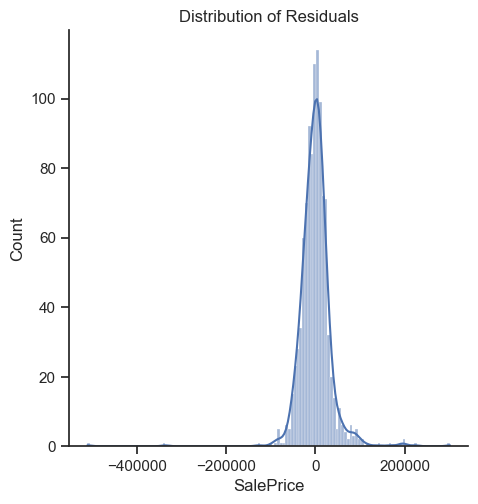

In [1249]:
res=y_train-y_pred_train
sns.displot(res,kde=True)
plt.title('Distribution of Residuals')
plt.show()

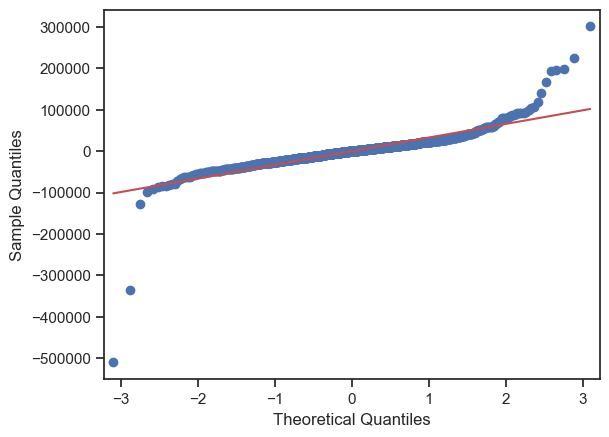

In [1250]:
from statsmodels.api import qqplot
sm.qqplot(res, line='r')
plt.show()